# <font color = blue> Clustering & PCA Assignment </font>
##### <font color = green>Dharini P </font>

### IMPORTING REQUIRED LIBRARIES

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 1000)

#scaling
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Hierarchical
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


### DATA READING & INSPECTION

In [2]:
# READING THE DATA:
country_df = pd.read_csv('Country-data.csv',encoding = "ISO-8859-1")

In [3]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#SHAPE OF DATA
country_df.shape

(167, 10)

In [5]:
#RETRIEVING COLUMN NAMES:
country_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype='object')

In [6]:
#DATATYPE INSPECTION:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


#### All variables are numeric except the country, which is object
#### COLUMN CONVERSION:
- Variables like exports, imports, health & inflation are given as percentage of GDP
- I choose not to convert them to actual values as we are more interested in clustering.
- Hence converting or not - is not going to affect the clustering

In [7]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Looking at the statistics, its clear tat there are outliers in the data, which we will treat subsequently. 

### DATA CLEANING:

In [8]:
# missing values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### There are NO MISSING VALUES in the data

In [9]:
# check for duplicates
country_df.loc[country_df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


#### No duplicates found in the dataset
### NO DATA QUALITY ISSUES OTHER THAN OUTLIERS FOUND IN THE DATA. Outliers to be treated subsequently,
#### NEw metrics are not derived as i feel the given variables are sufficient for analysis

### EDA & OUTLIER TREATMENT

In [10]:
# Lets check for correlation between the variables
country_cor = country_df.corr()

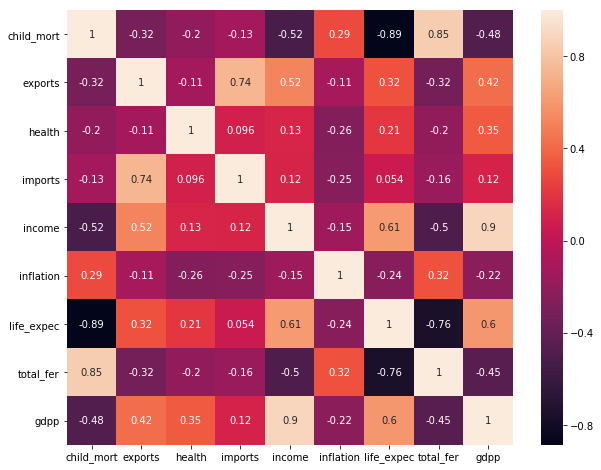

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(country_cor,annot=True)

  - From the heatmap, its evident that correlation exists between the variables
  - Income has high positive correlation with gdpp and life_expec
  - Exports has high positive correlation with imports
  - child_mort has high positive correlation with total_fer
  - High negative correlation exists between chid_mort & life_expec, life_expec & total_fer
  #### Correlation between variables will be treated using PCA

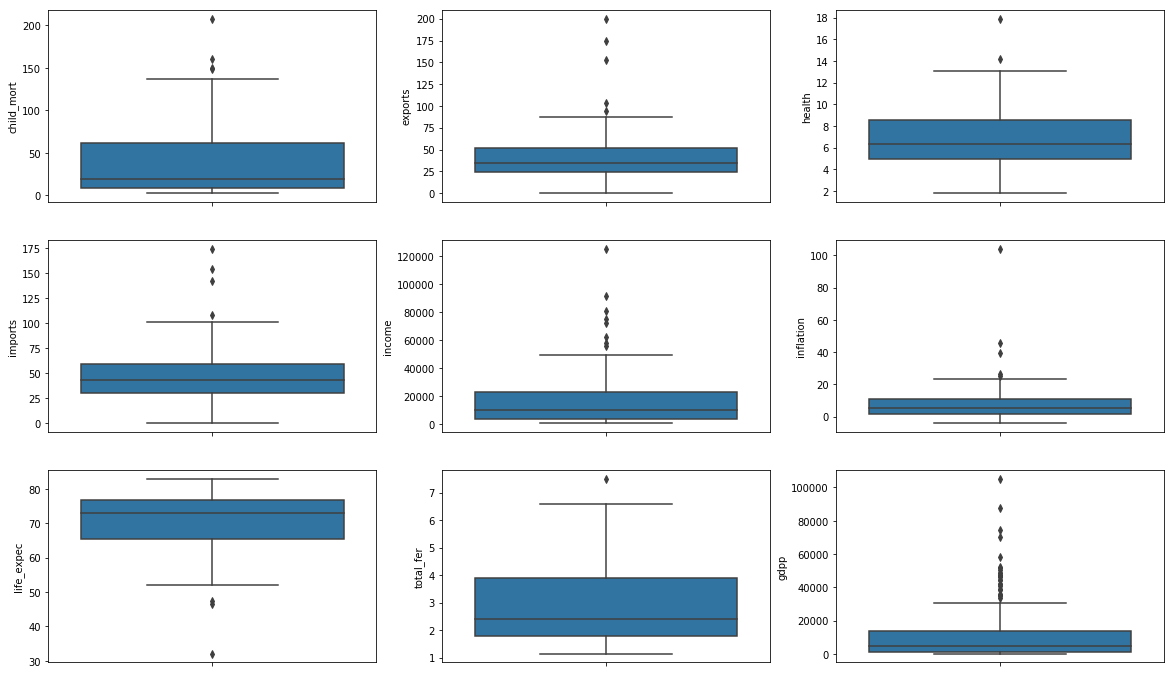

In [12]:
# Lets visualise the spread of numeric variable in the dataset
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = country_df)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = country_df)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = country_df)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = country_df)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = country_df)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = country_df)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = country_df)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = country_df)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = country_df)
plt.show()

###### Looking at the statistics using describe() function and the above box plot, we know there are outliers in the data. 
### LETS TREAT OUTLIERS BEFORE PCA

### OUTLIER Treatment:

In [13]:
#As the data is spread largely above the median(50th percentile), lets luk at 85, 90, 05 and 99 percentile values
country_df.describe(percentiles=[.25,.5,.75,0.85,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
85%,88.310000,65.330000,9.631000,64.520000,36200.000000,15.330000,79.910000,5.023000,31090.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


#####  Removing outliers will lead to data loss and countries in need of help may be removed in the process
##### Hence instead of removing, we can do floor and capping to treat outliers. Taking  95% and 5% percentile as cap and floor for each column 

In [14]:
country_numeric = country_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]

In [15]:
for col in country_numeric.columns:
    percentiles = country_df[col].quantile([0.05,0.95]).values
    country_df[col][country_df[col] <= percentiles[0]] = percentiles[0]
    country_df[col][country_df[col] >= percentiles[1]] = percentiles[1]

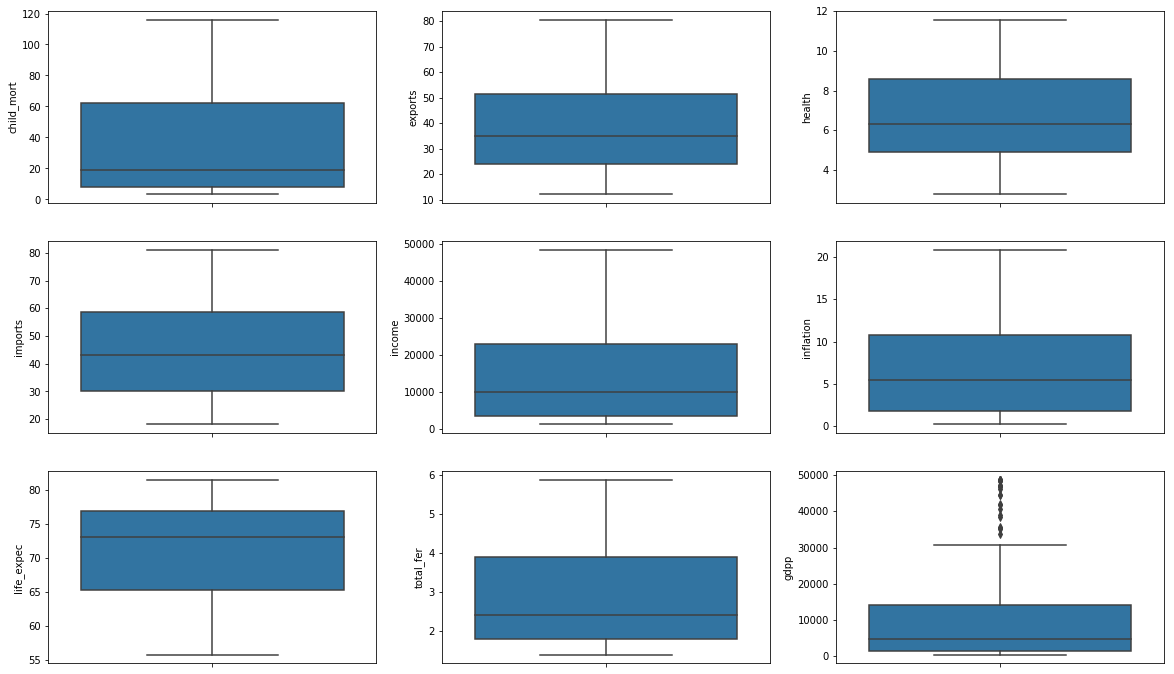

In [16]:
# Lets see the spread after the outlier treatment
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'child_mort', data = country_df)
plt.subplot(3,3,2)
sns.boxplot(y = 'exports', data = country_df)
plt.subplot(3,3,3)
sns.boxplot(y = 'health', data = country_df)
plt.subplot(3,3,4)
sns.boxplot(y = 'imports', data = country_df)
plt.subplot(3,3,5)
sns.boxplot(y = 'income', data = country_df)
plt.subplot(3,3,6)
sns.boxplot(y = 'inflation', data = country_df)
plt.subplot(3,3,7)
sns.boxplot(y = 'life_expec', data = country_df)
plt.subplot(3,3,8)
sns.boxplot(y = 'total_fer', data = country_df)
plt.subplot(3,3,9)
sns.boxplot(y = 'gdpp', data = country_df)
plt.show()

In [17]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.808623,39.310838,6.767419,45.364251,15755.491018,7.016075,70.830060,2.922389,12003.719162
std,36.193830,19.886059,2.529308,18.303537,14770.353771,6.271398,8.039216,1.438264,15154.443890
min,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000


#### Outliers are treated for most of the variables. GDPP stil has outliers. As i feel its an important variable for our problem statement, not treating the GDPP further as it may lead to incorrect clusters

### SCALING

In [18]:
# importing required library
from sklearn.preprocessing import StandardScaler

# instatiating the object
scaler = StandardScaler()
# fit_transform
country_scale = country_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']]
country_df_scaled = scaler.fit_transform(country_scale)
print(country_df_scaled.shape)

(167, 9)


### PRINCIPAL COMPONENT ANALYSIS (PCA)

In [19]:
#Importing required library
from sklearn.decomposition import PCA

#Instantiate
pca = PCA(random_state=100)

#Fit PCA on scaled dataset
pca.fit(country_df_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

#### Components from the PCA

In [20]:
pca.components_

array([[-0.42162279,  0.23215649,  0.1813805 ,  0.09452367,  0.41088706,
        -0.22517641,  0.43188141, -0.40669251,  0.39376521],
       [-0.032585  , -0.59983764,  0.19168628, -0.72998099,  0.11098633,
         0.07988177,  0.12988256, -0.00878147,  0.18404209],
       [-0.0942617 ,  0.2952823 , -0.6464977 , -0.28358913,  0.19801532,
         0.59047762,  0.11300352, -0.06006172,  0.03591559],
       [ 0.38786406,  0.25262507,  0.28376472,  0.0125846 ,  0.41984315,
         0.16964945, -0.22521603,  0.44660741,  0.49983159],
       [-0.19496651, -0.00132005,  0.57949838,  0.18931826, -0.12407315,
         0.72264373,  0.05963656, -0.13130044, -0.17866759],
       [ 0.0785088 ,  0.54567481,  0.26573873, -0.52564965, -0.06307461,
        -0.15212556, -0.37864464, -0.36368563, -0.21538605],
       [ 0.13002118, -0.35338869, -0.1492239 ,  0.24961913,  0.21838481,
         0.11649633, -0.56635232, -0.59092125,  0.20597879],
       [-0.77090607, -0.02573741, -0.02487332, -0.03452382,  0

#### Explained variance ratio for each component

In [21]:
pca.explained_variance_ratio_

array([0.49018372, 0.16342209, 0.13895338, 0.09695666, 0.06375024,
       0.01874168, 0.01568208, 0.00866837, 0.00364178])

#### SCREE PLOT

In [22]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.49018372, 0.65360581, 0.79255919, 0.88951584, 0.95326609,
       0.97200776, 0.98768985, 0.99635822, 1.        ])

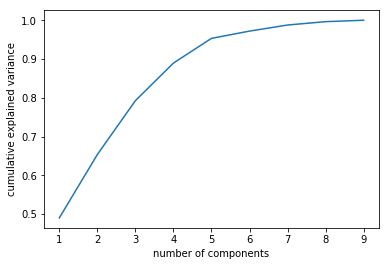

In [23]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

##### Around 95% of variance is explained by 5 principal components`. We will choose 5 components for our modelling

#### Checking the load of variables on the selected 5 principal components:

In [24]:
col = list(country_scale.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                      'PC4':pca.components_[3],'PC5':pca.components_[4], 'Feature':col})
pca_df

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.421623,-0.032585,-0.094262,0.387864,-0.194967,child_mort
1,0.232156,-0.599838,0.295282,0.252625,-0.001320,exports
2,0.181381,0.191686,-0.646498,0.283765,0.579498,health
3,0.094524,-0.729981,-0.283589,0.012585,0.189318,imports
4,0.410887,0.110986,0.198015,0.419843,-0.124073,income
5,-0.225176,0.079882,0.590478,0.169649,0.722644,inflation
6,0.431881,0.129883,0.113004,-0.225216,0.059637,life_expec
7,-0.406693,-0.008781,-0.060062,0.446607,-0.131300,total_fer
8,0.393765,0.184042,0.035916,0.499832,-0.178668,gdpp


#### plotting the first 2 principal componants to visualise the variables:

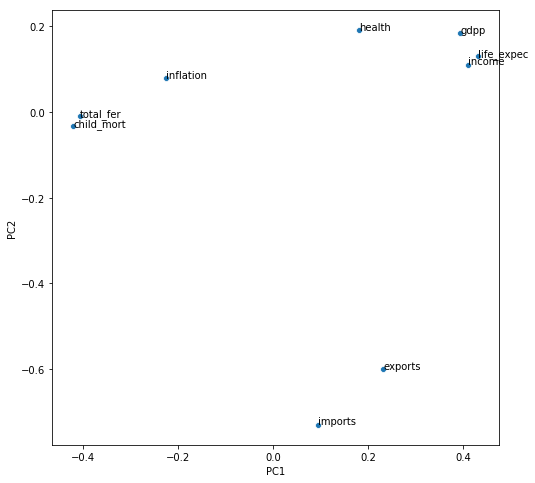

In [25]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x='PC1',y='PC2',palette="set8",data=pca_df)
for i, txt in enumerate(pca_df['Feature']):
    ax.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]))
plt.show()

##### We infer from the above plot that:
- High variation of imports and exports in direction of pc1
- Variation of income, gdpp and life_expec is more in direction of pc1 and less in direction of pc2
- PC2 is in the direction of child_mort inflation & total_fer

#### INCREMENTAL PCA

In [26]:
# Importing library:
from sklearn.decomposition import IncrementalPCA

#Instantiate
pca_incremental = IncrementalPCA(n_components=5)

#Fit transformed intremental PCA on scaled dataset - to transform the data with respect to 5 PC
pca_df_final = pca_incremental.fit_transform(country_df_scaled)

In [27]:
pca_df_final.shape

(167, 5)

In [28]:
# MAKING DATAFRAME FOR BETTER READABILITY
pca_df_final = pd.DataFrame(pca_df_final, columns=["PC1", "PC2",'PC3','PC4','PC5'])
pca_df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.276496,-0.384763,1.062327,0.915380,0.050308
1,0.482584,-0.138287,0.316266,-1.430107,0.097874
2,-0.447400,-0.491523,-1.776731,-0.670289,0.515918
3,-3.357084,1.158895,-2.059029,1.732847,0.082381
4,1.245015,0.702900,0.224338,-0.744108,-0.447938


#### check for outliers post PCA

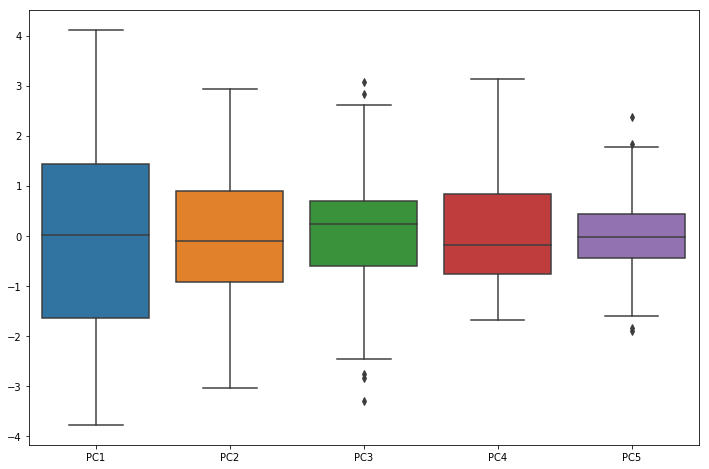

In [29]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=pca_df_final)
plt.show()

- PC3 & PC5 shows minimal outliers
- As the extreme datapoints are already capped and floored during outlier treatment beofre pca, i do not want to treat them again.
- Removing them will lead to missing of countries which needs aid

In [30]:
# making a copy to use for kmeans and hierarchical
pca_kmeans = pca_df_final.copy()
pca_hie = pca_df_final.copy()

### Correlation of principal components

In [31]:
corrmat = np.corrcoef(pca_df_final.transpose())

In [32]:
corrmat.shape

(5, 5)

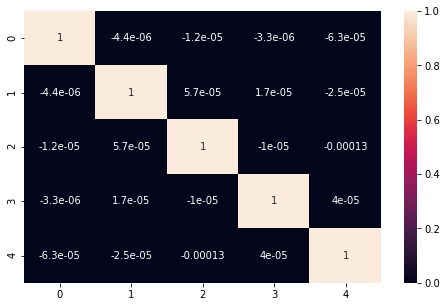

In [33]:
plt.figure(figsize=[8,5])
sns.heatmap(corrmat, annot=True)

- As expected, the correlation between the principal components is almost equal to zero, which means the principal components are NOT CORRELATED or NO RELATIONSHIP

### HOPKINS STATISTIC:
- The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [40]:
hopkins(pca_kmeans)

0.7265389762926219

- 0.73 - the value is between {0.7, ..., 0.99}, it has a high tendency to cluster

### K-MEANS CLUSTERING

In [41]:
#Impoorting library
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Optimal Number of Clusters - Elbow method & silhouette analysis
- The number of clusters doesnot depend on the below techniques alone. It also depends business aspects of it

#### ELBOW -CURVE METHOD:

In [42]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2,3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_kmeans)
    
    ssd.append(kmeans.inertia_)

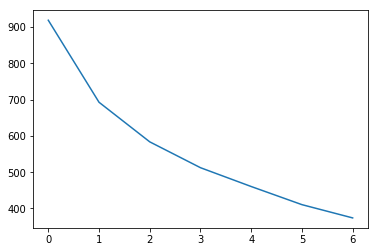

In [43]:
# PLOTTING SSD
plt.plot(ssd)
plt.show()

- From the above plot, we can say that k= 3 looks like the right number of clusters. We shall look at the silhouette score as well

#### SILHOUETTE ANALSYIS:

In [44]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(pca_kmeans)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_kmeans, cluster_labels)
    silhouette = round(silhouette_avg,2)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette))

For n_clusters=2, the silhouette score is 0.3
For n_clusters=3, the silhouette score is 0.29
For n_clusters=4, the silhouette score is 0.27
For n_clusters=5, the silhouette score is 0.27
For n_clusters=6, the silhouette score is 0.29
For n_clusters=7, the silhouette score is 0.27
For n_clusters=8, the silhouette score is 0.29


- From silhouette analysis also, 3 clusters seems fine
- From business view point 3 clusters as developed, developing & under developed makes sense. Hence proceeding with k=3

#### K-MEANS WITH K=3

In [45]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(pca_kmeans)
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

#### ASSIGNING CLUSTER IDS K=3

In [46]:
# assign the cluster_id - principal componants
pca_kmeans['cluster_id'] = kmeans.labels_
pca_kmeans['country']=country_df['country']
pca_kmeans.head()

,PC1,PC2,PC3,PC4,PC5,cluster_id,country
0,-3.276496,-0.384763,1.062327,0.915380,0.050308,2,Afghanistan
1,0.482584,-0.138287,0.316266,-1.430107,0.097874,1,Albania
2,-0.447400,-0.491523,-1.776731,-0.670289,0.515918,1,Algeria
3,-3.357084,1.158895,-2.059029,1.732847,0.082381,2,Angola
4,1.245015,0.702900,0.224338,-0.744108,-0.447938,1,Antigua and Barbuda


In [47]:
# assigning cluster ids to the country dataframe
country_k3 = country_df.copy()
# assign the label
country_k3['cluster_id'] = kmeans.labels_
country_k3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,2
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,1
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


#### CLUSTER ANALYSIS - K-MEANS WITH K=3

#### Cluster analysis with respect to PRINCIPAL COMPONENTS:

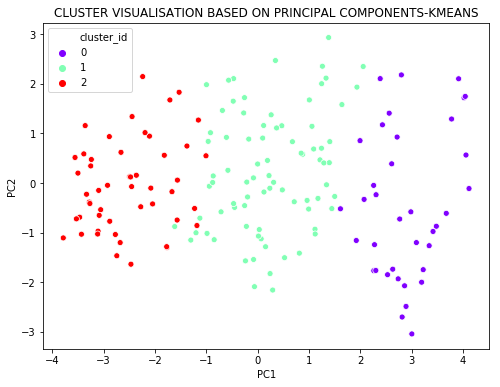

In [48]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',palette="rainbow",data=pca_kmeans)
plt.title('CLUSTER VISUALISATION BASED ON PRINCIPAL COMPONENTS-KMEANS')
plt.show()

- We have plotted first 2 principal componEnts for the countries and can clearly see 3 clusters from the plot

#### Cluster analysis with respect to ORIGINAL VARIABLES:

In [49]:
country_k3['cluster_id'].value_counts()

1    80
2    50
0    37
Name: cluster_id, dtype: int64

#####  Lets visualise the clusters AGAIN to analyse it by comparing how the three variables - [gdpp, child_mort and income] vary for each cluster of countries :

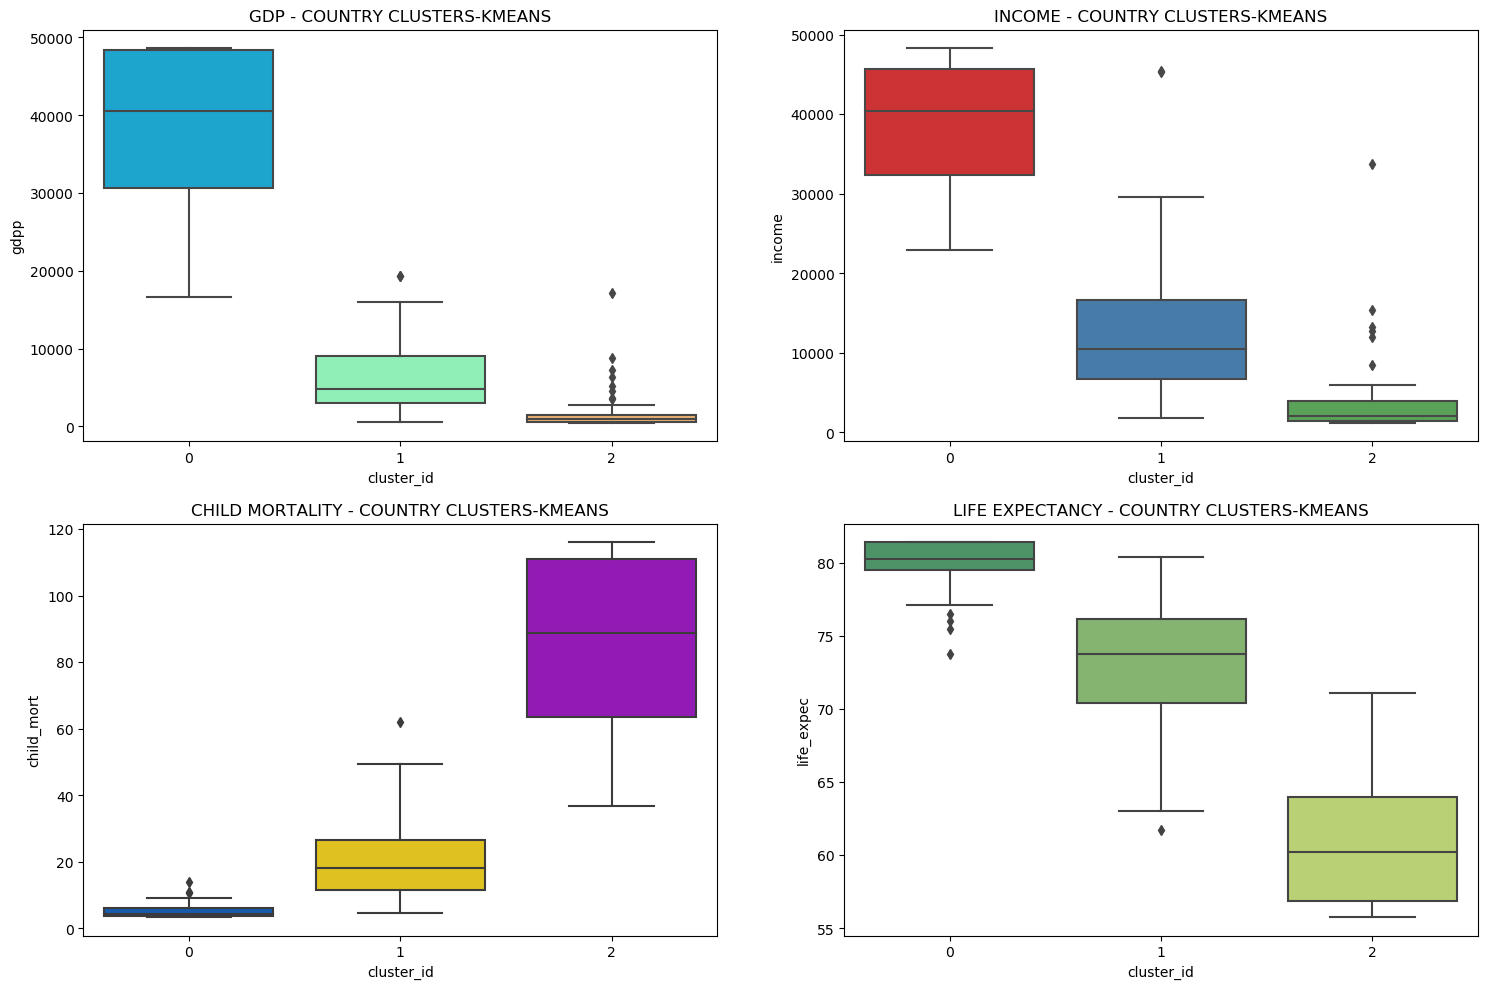

In [50]:
plt.figure(figsize=(18, 12),dpi=100)
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='gdpp', data=country_k3, palette='rainbow')
plt.title('GDP - COUNTRY CLUSTERS-KMEANS')
plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='income', data=country_k3,palette='Set1')
plt.title('INCOME - COUNTRY CLUSTERS-KMEANS')
plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='child_mort', data=country_k3,palette='prism')
plt.title('CHILD MORTALITY - COUNTRY CLUSTERS-KMEANS')
plt.subplot(2,2,4)
sns.boxplot(x='cluster_id', y='life_expec', data=country_k3,palette='summer')
plt.title('LIFE EXPECTANCY - COUNTRY CLUSTERS-KMEANS')
plt.show()

- Now its quiet clear and ALL THE 3 clusters are unique
- Cluster 0 - DEVELOPED COUNTRIES - HIGH gdpp,income & life_expec & VERY LOW child_mort
- Cluster 2 - UNDER - DEVELOPED COUNTRIES - VERY LOW gdpp,income & life_expec & HIGH child_mort
- Cluster 1 - DEVELOPING COUNTRIES - LOW gdpp, AVERAGE income & life_expec & LOW child_mort
- Its evident that cluster 2 needs AID
- Lets do further analysis and confirm which all countries need AID

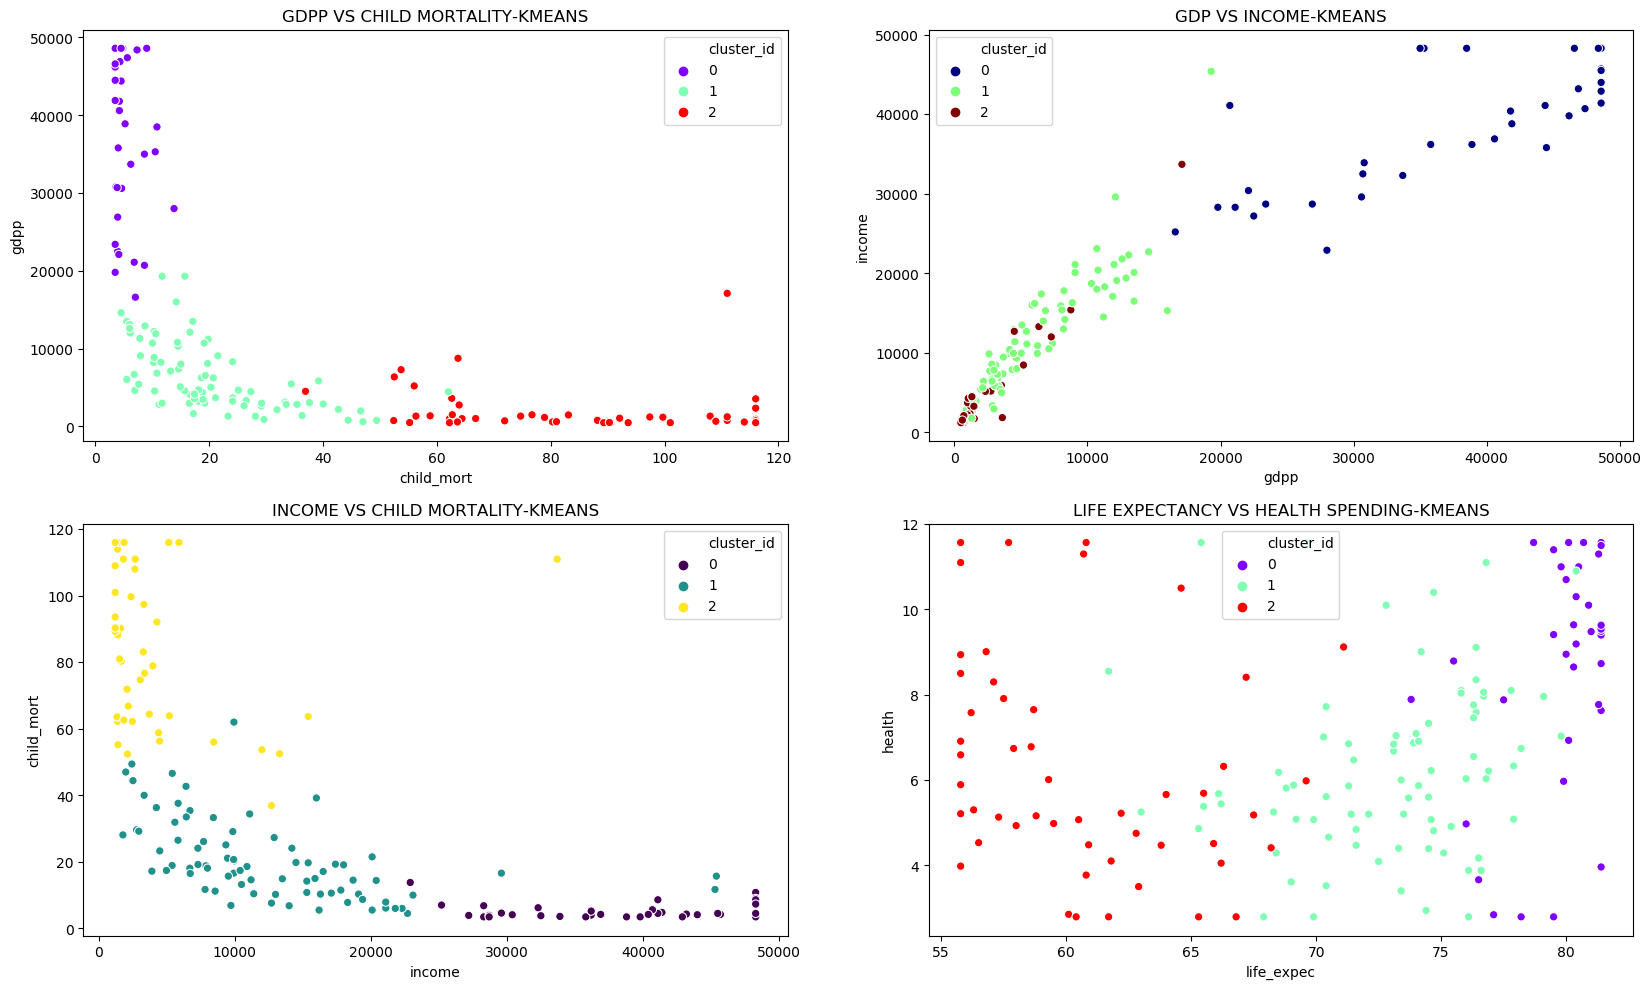

In [51]:
# plotting original variables on the clusters
plt.figure(figsize=(20, 12),dpi=100)
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_id',legend='full',palette="rainbow",data=country_k3)
plt.title('GDPP VS CHILD MORTALITY-KMEANS')

plt.subplot(2,2,2)
sns.scatterplot(x='gdpp',y='income',hue='cluster_id',legend='full',palette="jet",data=country_k3)
plt.title('GDP VS INCOME-KMEANS')

plt.subplot(2,2,3)
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',legend='full',palette="viridis",data=country_k3)
plt.title('INCOME VS CHILD MORTALITY-KMEANS')

plt.subplot(2,2,4)
sns.scatterplot(x='life_expec',y='health',hue='cluster_id',legend='full',palette="rainbow",data=country_k3)
plt.title('LIFE EXPECTANCY VS HEALTH SPENDING-KMEANS')
plt.show()

- From the above plots, we infer that:
    - GDPP VA CHILD_MORT --> Lower the GDP of clusters, higher is the child mortality rate
    - GDPP VA INCOME --> When gdp is more, income per person is also more
    - INCOME VS CHILD_MORT --> Countries having high income have low child mortality rate and vice versa
    - LIFE_EXPEC VS HEALTH --> No definite pattern observed

#### MEAN ANALYSIS OF CLUSTERS:

In [52]:
country_df_mean = country_k3.groupby(['cluster_id']).mean()

In [53]:
country_df_mean = country_df_mean.reset_index()
country_df_mean.head()

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.344324,49.753514,8.624108,45.197838,38711.081081,2.834373,79.805405,1.767838,37745.675676
1,1,20.656250,41.138125,6.234038,48.001750,12506.625000,7.130223,73.000000,2.297750,6422.325000
2,2,85.936000,28.659600,6.246880,41.267400,3966.540000,9.927900,60.716400,4.776180,1884.902000


#### renaming the cluster ids:
-  cluster_id 0 -> DEVELOPED COUNTRIES
-  cluster_id 1 -> DEVELOPING COUNTRIES
-  cluster_id 2 -> UNDER - DEVELOPED COUNTRIES

In [54]:
def cluster(x,y):
    country_df_mean['cluster_id'].replace(x,y,inplace=True)
    
cluster(0,'Developed countries')
cluster(1,'Developing countries')
cluster(2,'UnderDeveloped countries')

In [55]:
country_df_mean.head()

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Developed countries,5.344324,49.753514,8.624108,45.197838,38711.081081,2.834373,79.805405,1.767838,37745.675676
1,Developing countries,20.656250,41.138125,6.234038,48.001750,12506.625000,7.130223,73.000000,2.297750,6422.325000
2,UnderDeveloped countries,85.936000,28.659600,6.246880,41.267400,3966.540000,9.927900,60.716400,4.776180,1884.902000


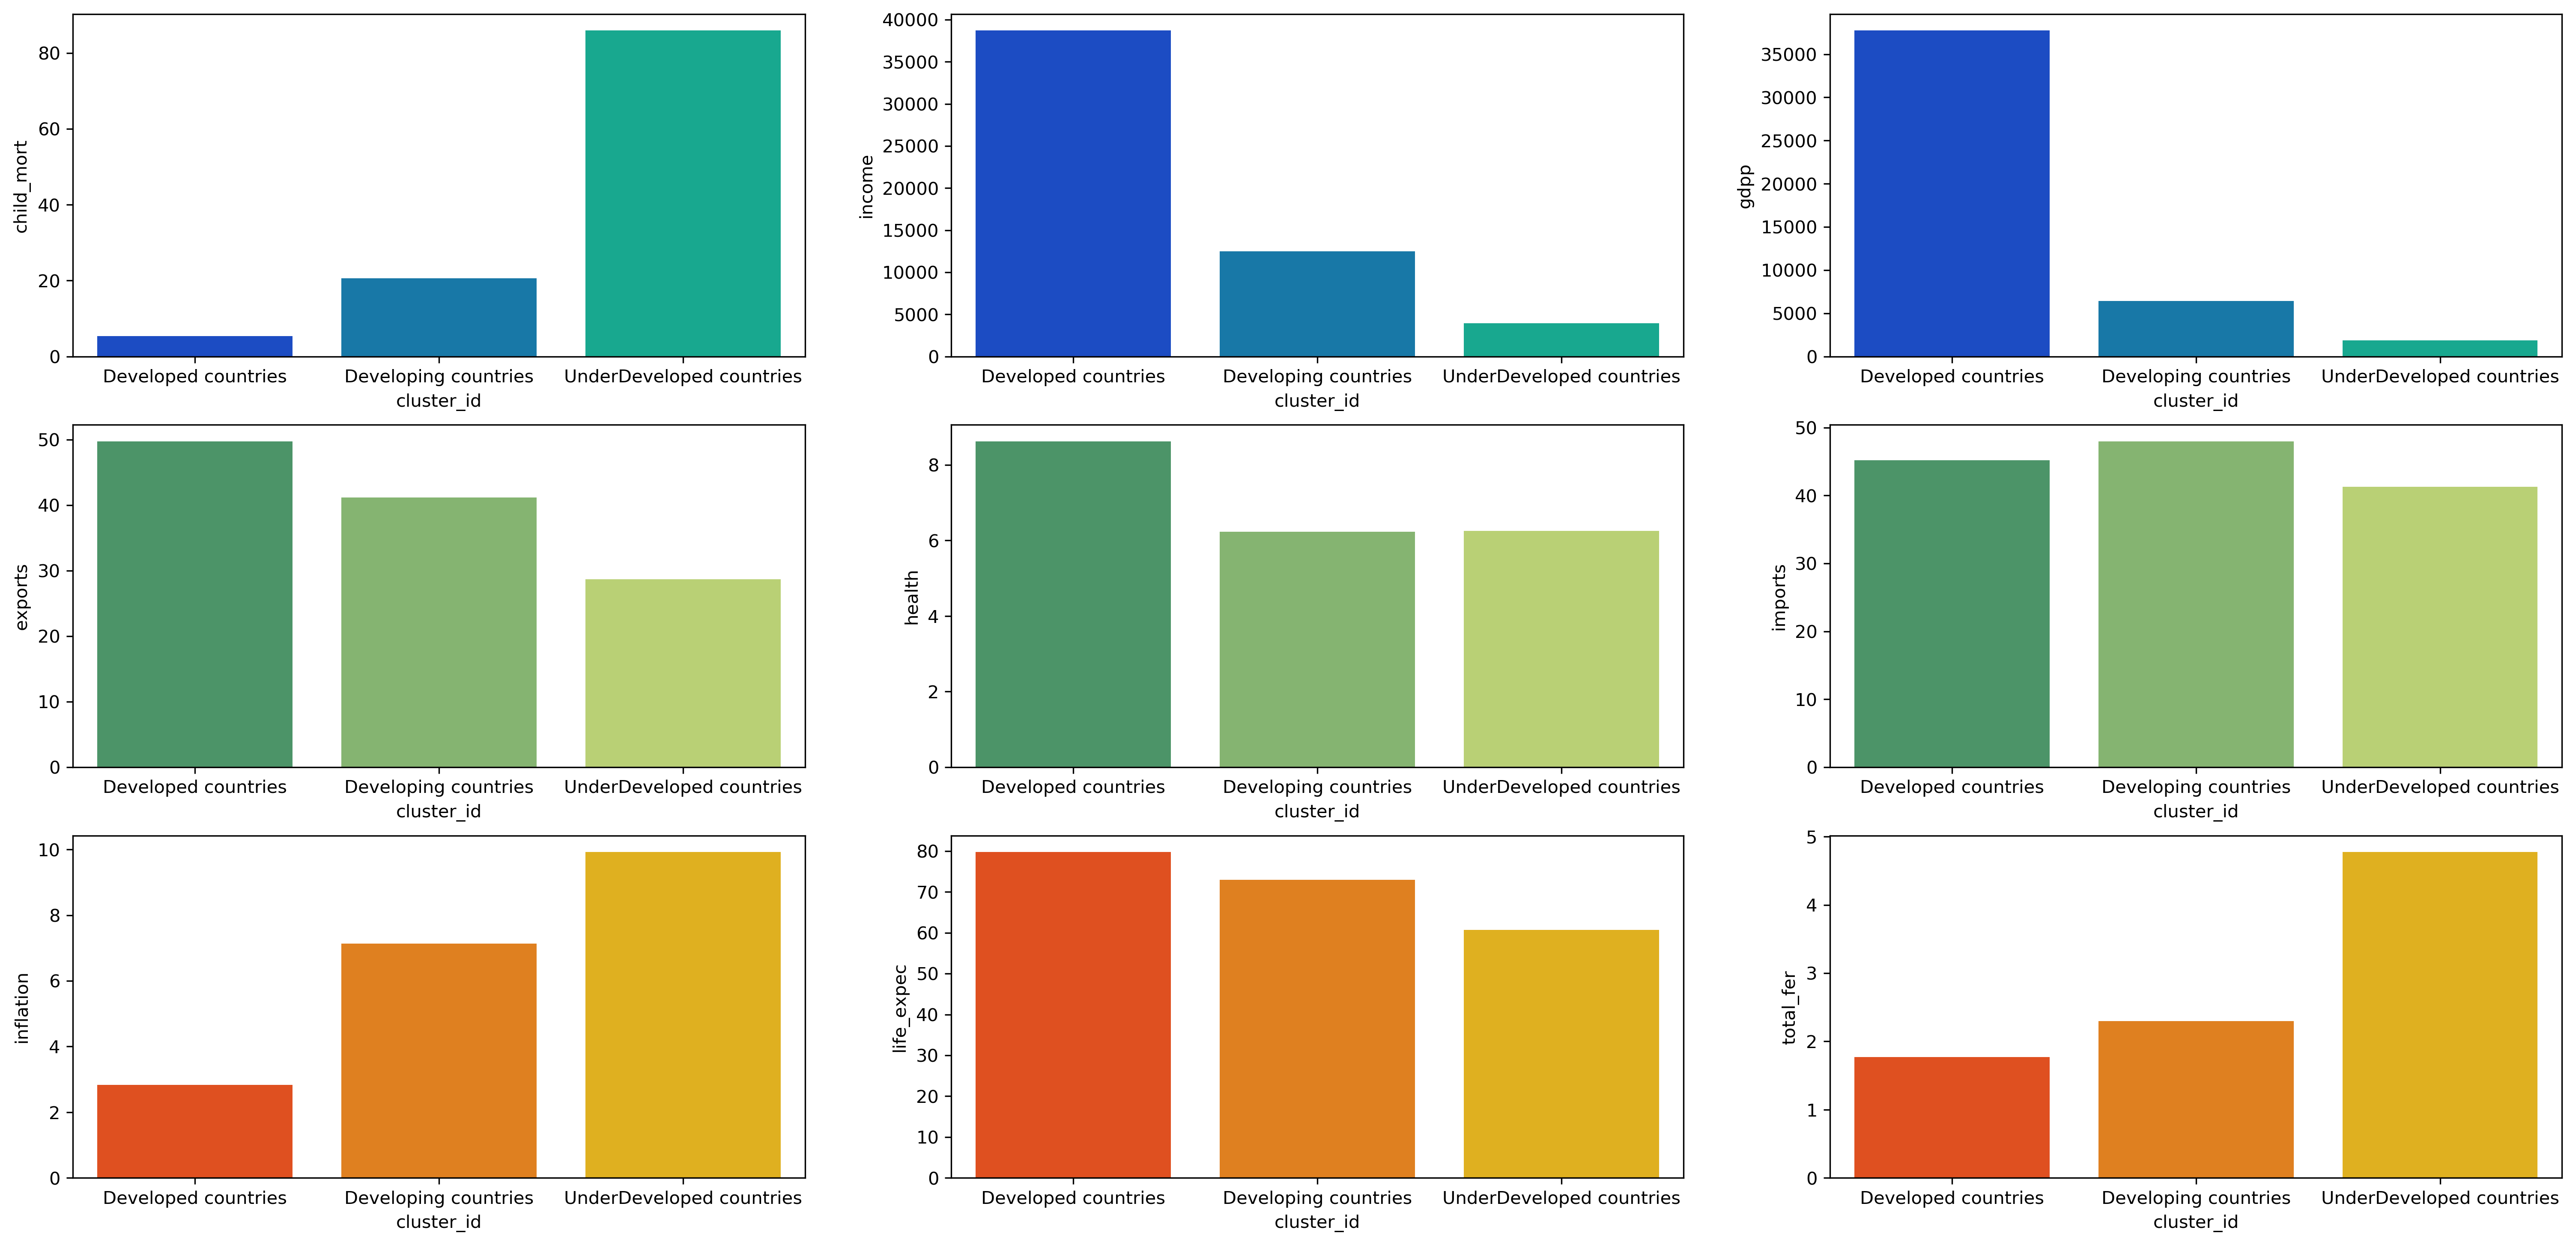

In [56]:
plt.figure(figsize=(25, 12),dpi=300)
plt.subplot(3,3,1)
sns.barplot(x='cluster_id',y='child_mort',data=country_df_mean,palette='winter')

plt.subplot(3,3,2)
sns.barplot(x='cluster_id',y='income',data=country_df_mean,palette='winter')

plt.subplot(3,3,3)
sns.barplot(x='cluster_id',y='gdpp',data=country_df_mean,palette='winter')

plt.subplot(3,3,4)
sns.barplot(x='cluster_id',y='exports',data=country_df_mean,palette='summer')

plt.subplot(3,3,5)
sns.barplot(x='cluster_id',y='health',data=country_df_mean,palette='summer')

plt.subplot(3,3,6)
sns.barplot(x='cluster_id',y='imports',data=country_df_mean,palette='summer')

plt.subplot(3,3,7)
sns.barplot(x='cluster_id',y='inflation',data=country_df_mean,palette='autumn')

plt.subplot(3,3,8)
sns.barplot(x='cluster_id',y='life_expec',data=country_df_mean,palette='autumn')

plt.subplot(3,3,9)
sns.barplot(x='cluster_id',y='total_fer',data=country_df_mean,palette='autumn')

plt.show()

- From the mean analysis of cluster of all variables, we can observe the following:
    - Only gdpp, income & child_mort show considerable difference in clusters.
    - Developed countries:
        - HIGH - gdp, income, health spending, exports, life expectancy
        - Avg - imports
        - VERY LOW - child mortality, inflation, total fertility
    - Developing countries:
        - AVG - health spending,exports, life expectancy, total fertility,child mortality, inflation,income
        - HIGH - imports
        - LOW - gdp
    - UnderDeveloped countries:
        - VERY LOW - gdp, income,exports, life expectancy,Imports
        - Avg - health spending
        - HIGH - child mortality, inflation, total fertility

#### PLOTTING TOP 10 COUNTRIES IN EACH CLUSTER WRT GDPP,INCOME & CHILD_MORT

In [57]:
# forming 3 new dataframe for each cluster
developed_df = country_k3.loc[country_k3.cluster_id ==0]
developing_df = country_k3.loc[country_k3.cluster_id ==1]
UnderDeveloped_df = country_k3.loc[country_k3.cluster_id ==2]

In [58]:
print(developed_df.shape)
print(developing_df.shape)
print(UnderDeveloped_df.shape)

(37, 11)
(80, 11)
(50, 11)


#### DEVELOPED COUNTRIES-CLUSTER 0-KMEANS:

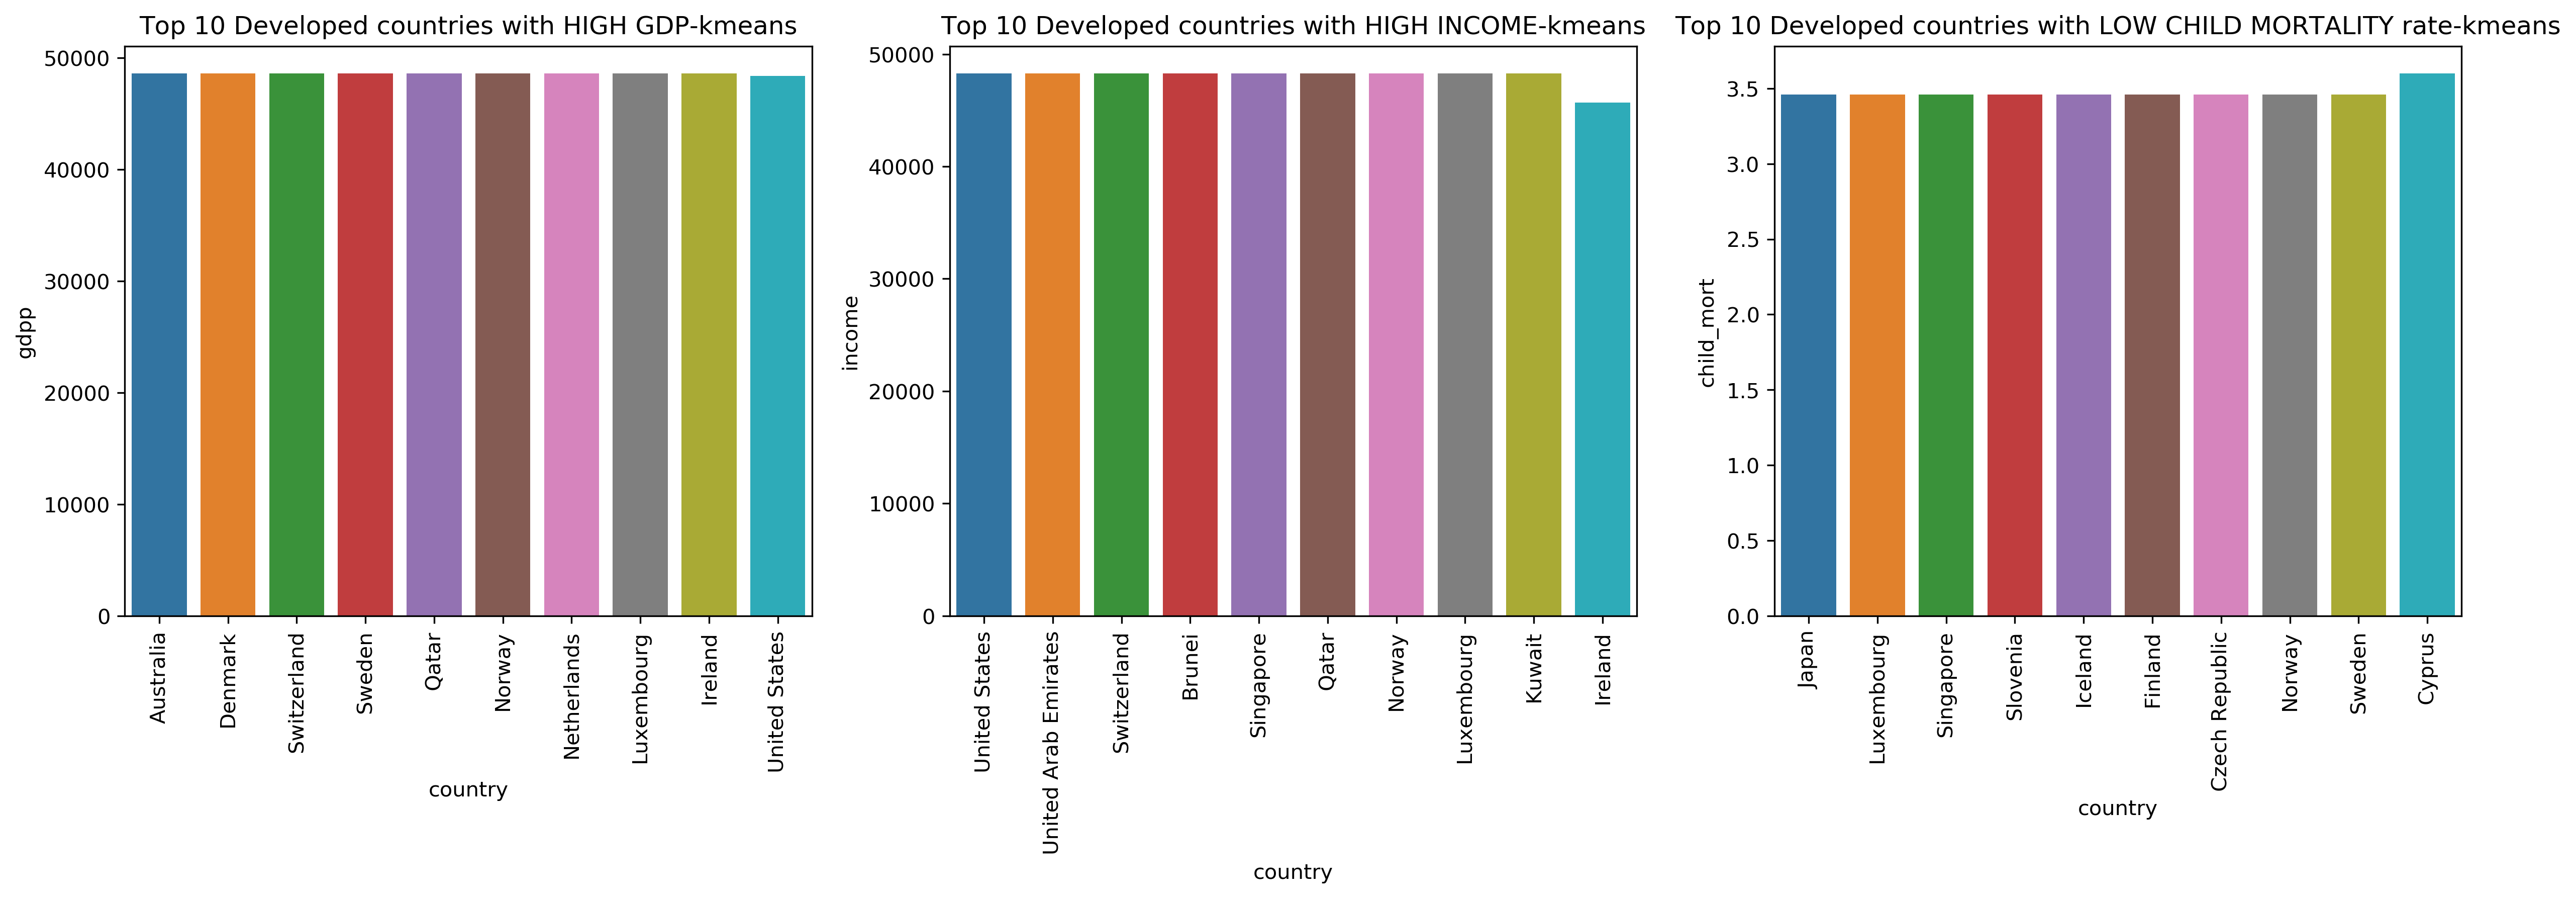

In [59]:
plt.figure(figsize=(20,5),dpi=300)
plt.subplot(1,3,1)
result = developed_df.groupby(["country"])['gdpp'].aggregate(np.median).reset_index().sort_values('gdpp',ascending = False)
top10_gdp_0 = result.head(10)
ax = sns.barplot(x='country',y='gdpp',data=top10_gdp_0)
plt.title('Top 10 Developed countries with HIGH GDP-kmeans')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
result = developed_df.groupby(["country"])['income'].aggregate(np.median).reset_index().sort_values('income',ascending = False)
top10_inc_0 = result.head(10)
ax = sns.barplot(x='country',y='income',data=top10_inc_0)
plt.title('Top 10 Developed countries with HIGH INCOME-kmeans')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
result = developed_df.groupby(["country"])['child_mort'].aggregate(np.median).reset_index().sort_values('child_mort',ascending = True)
top10_chi_0 = result.head(10)
ax = sns.barplot(x='country',y='child_mort',data=top10_chi_0)
plt.title('Top 10 Developed countries with LOW CHILD MORTALITY rate-kmeans')
plt.xticks(rotation='vertical')
plt.show()

- The developed countries have very high gdp and income per person and very low child mortality rate
- Below are the top developed countries:
   - Australia
   - Denmark
   - Switzerland
   - Sweden
   - Qatar
   - Norway
   - Netherlands
   - Luxemberg
   - Ireland
   - UnitedStates
   - UAE
   - Kuwait
   - Singapore
   - Iceland
   - Japan
   - Finland

#### DEVELOPING COUNTRIES-CLUSTER 1-KMEANS:

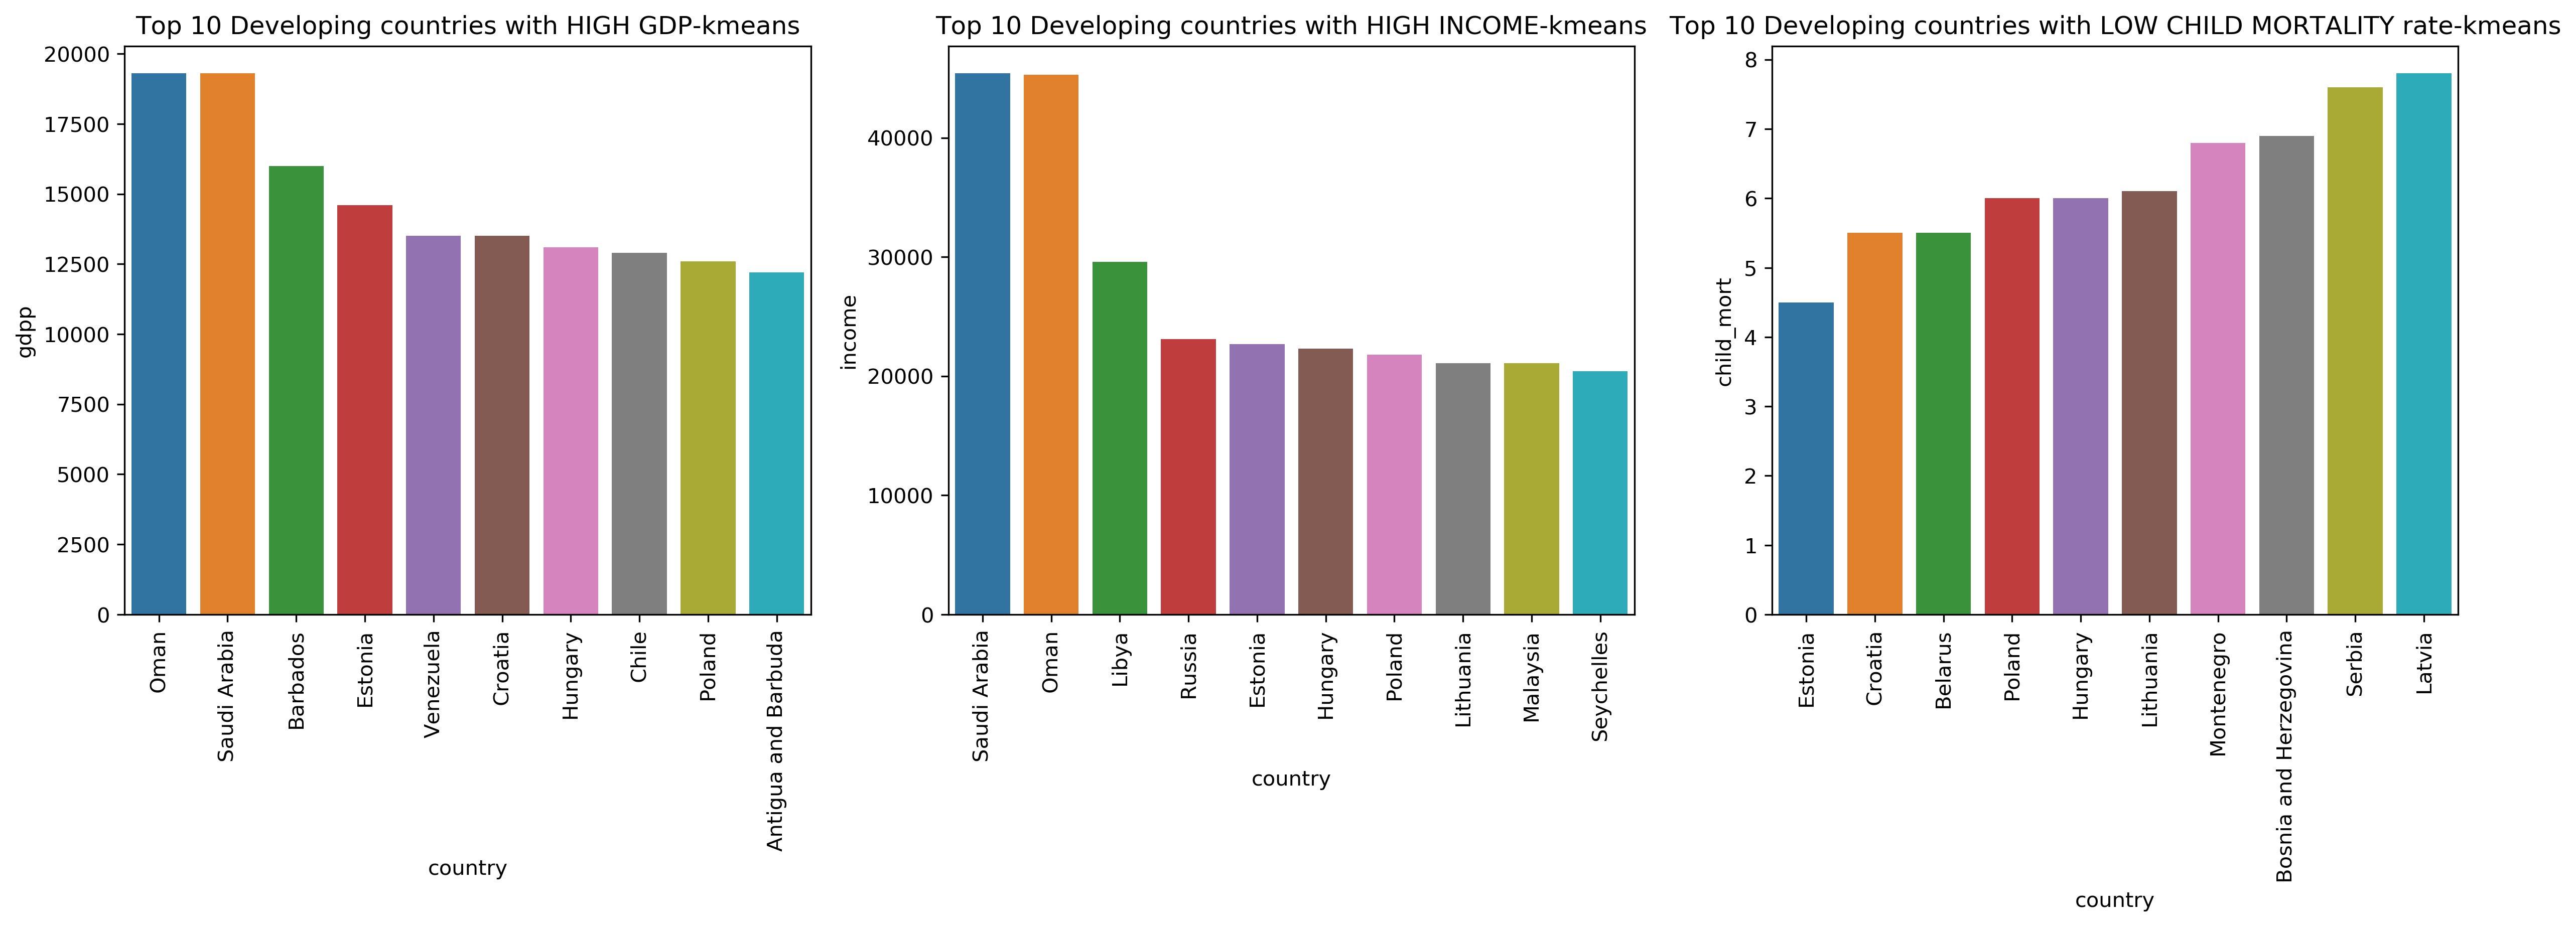

In [60]:
plt.figure(figsize=(20,5),dpi=300)
plt.subplot(1,3,1)
result = developing_df.groupby(["country"])['gdpp'].aggregate(np.median).reset_index().sort_values('gdpp',ascending = False)
top10_gdp_1 = result.head(10)
ax = sns.barplot(x='country',y='gdpp',data=top10_gdp_1)
plt.title('Top 10 Developing countries with HIGH GDP-kmeans')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
result = developing_df.groupby(["country"])['income'].aggregate(np.median).reset_index().sort_values('income',ascending = False)
top10_inc_1 = result.head(10)
ax = sns.barplot(x='country',y='income',data=top10_inc_1)
plt.title('Top 10 Developing countries with HIGH INCOME-kmeans')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
result = developing_df.groupby(["country"])['child_mort'].aggregate(np.median).reset_index().sort_values('child_mort',ascending = True)
top10_chi_1 = result.head(10)
ax = sns.barplot(x='country',y='child_mort',data=top10_chi_1)
plt.title('Top 10 Developing countries with LOW CHILD MORTALITY rate-kmeans')
plt.xticks(rotation='vertical')
plt.show()

- The developing countries have very low gdp and income per person and average child mortality rate
- Below are the top developing countries:
   - Oman
   - Saudi arabia
   - Libya
   - Malaysia
   - Hungary
   - Lithuania
   - Poland
   - Croatia
   - Estonia
   - Serbia
   - Barbados
   - Russia
   - Belarus
   - Latvia

#### UNDER-DEVELOPED COUNTRIES-CLUSTER 2-KMEANS:

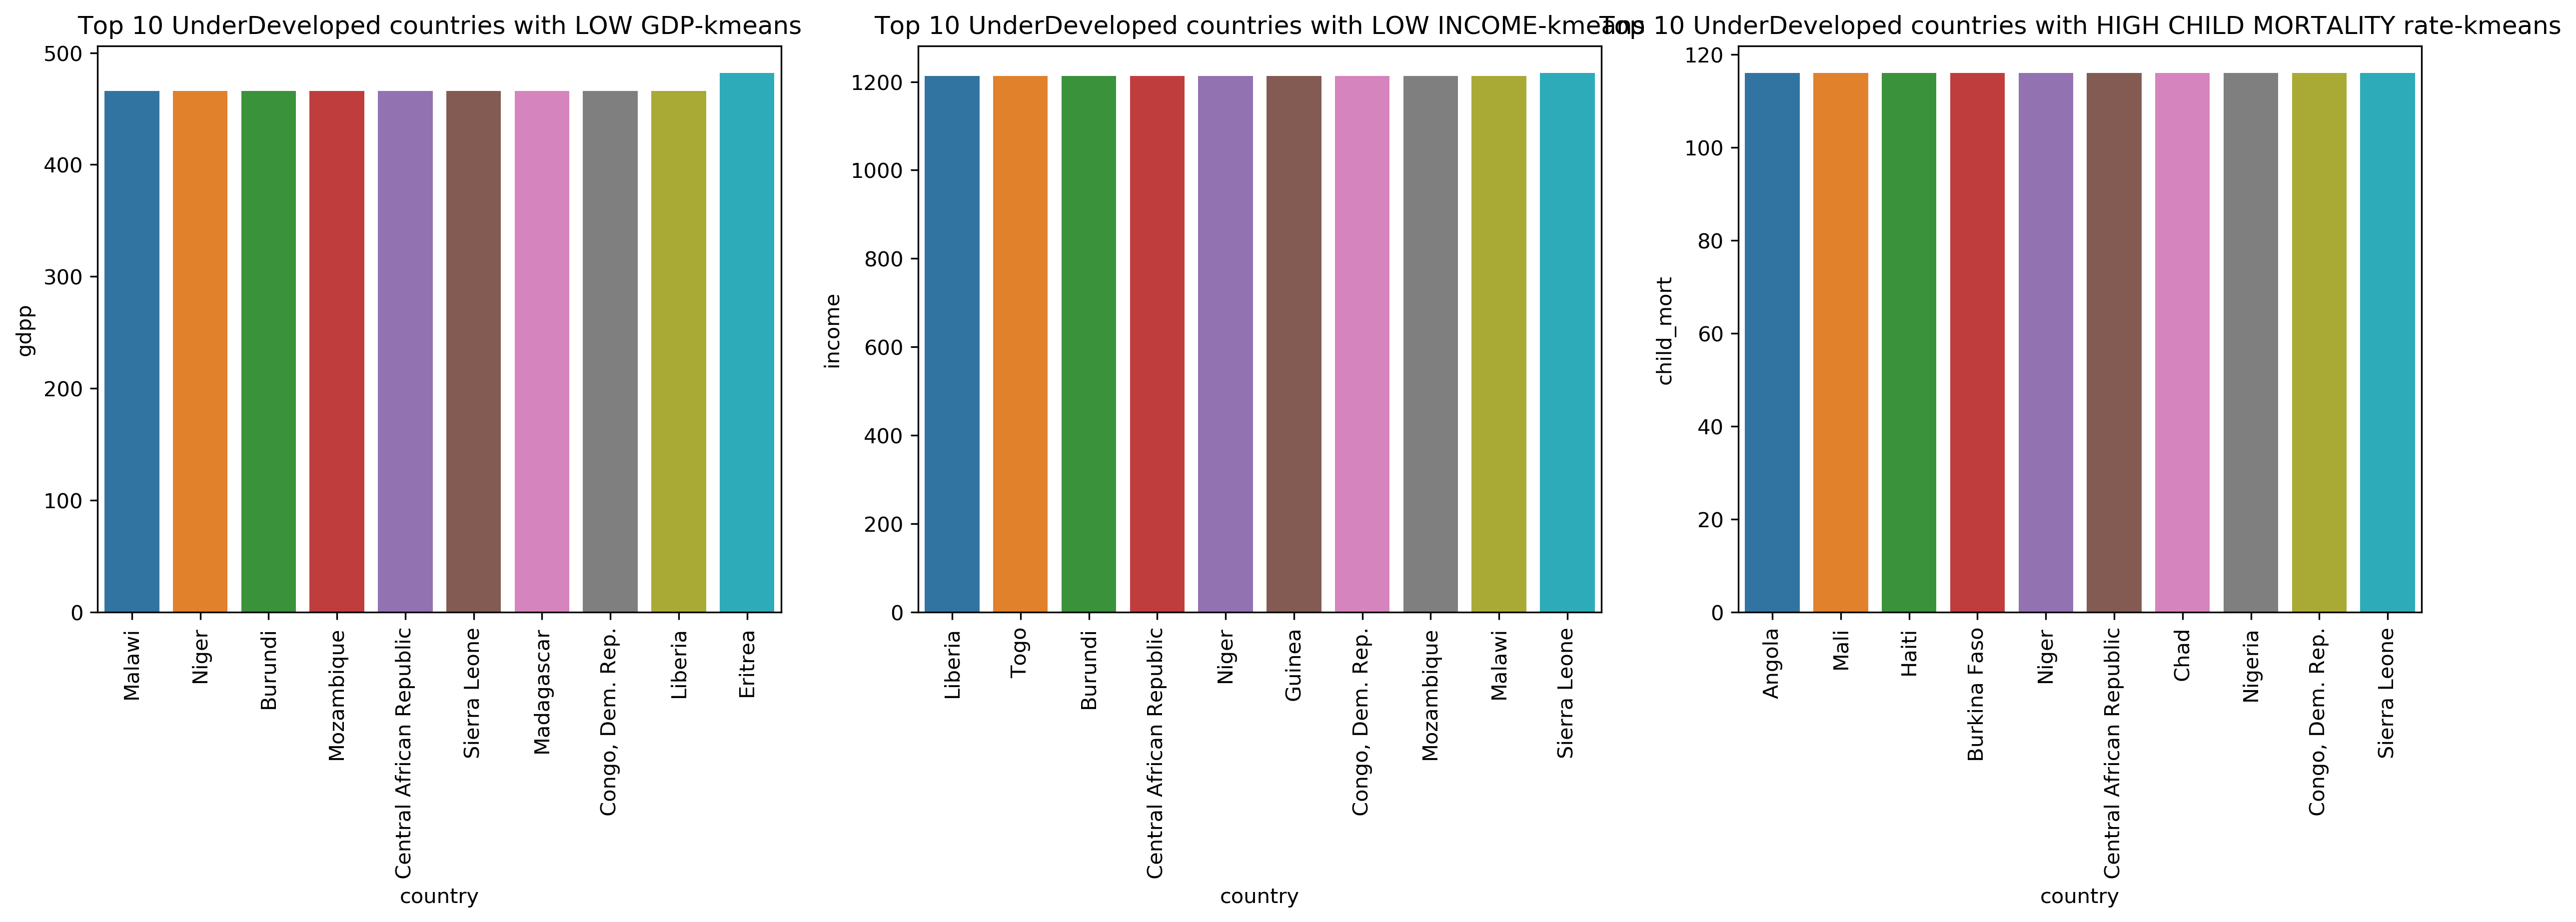

In [61]:
plt.figure(figsize=(20,5),dpi=300)
plt.subplot(1,3,1)
result = UnderDeveloped_df.groupby(["country"])['gdpp'].aggregate(np.median).reset_index().sort_values('gdpp',ascending = True)
top10_gdp_2 = result.head(10)
ax = sns.barplot(x='country',y='gdpp',data=top10_gdp_2)
plt.title('Top 10 UnderDeveloped countries with LOW GDP-kmeans')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
result = UnderDeveloped_df.groupby(["country"])['income'].aggregate(np.median).reset_index().sort_values('income',ascending = True)
top10_inc_2 = result.head(10)
ax = sns.barplot(x='country',y='income',data=top10_inc_2)
plt.title('Top 10 UnderDeveloped countries with LOW INCOME-kmeans')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
result = UnderDeveloped_df.groupby(["country"])['child_mort'].aggregate(np.median).reset_index().sort_values('child_mort',ascending = False)
top10_chi_2 = result.head(10)
ax = sns.barplot(x='country',y='child_mort',data=top10_chi_2)
plt.title('Top 10 UnderDeveloped countries with HIGH CHILD MORTALITY rate-kmeans')
plt.xticks(rotation='vertical')
plt.show()

In [62]:
top10_gdp_2['country'].values

array(['Malawi', 'Niger', 'Burundi', 'Mozambique',
       'Central African Republic', 'Sierra Leone', 'Madagascar',
       'Congo, Dem. Rep.', 'Liberia', 'Eritrea'], dtype=object)

In [63]:
top10_inc_2['country'].values

array(['Liberia', 'Togo', 'Burundi', 'Central African Republic', 'Niger',
       'Guinea', 'Congo, Dem. Rep.', 'Mozambique', 'Malawi',
       'Sierra Leone'], dtype=object)

In [64]:
top10_chi_2['country'].values

array(['Angola', 'Mali', 'Haiti', 'Burkina Faso', 'Niger',
       'Central African Republic', 'Chad', 'Nigeria', 'Congo, Dem. Rep.',
       'Sierra Leone'], dtype=object)

- As per K-means clustering, below are the countries which are in dire need of aid. The below countries have very low gdp and income per person and very high child mortality rate
    - Burundi
    - Malawi
    - Niger
    - Mozambique
    - Central African republic
    - Sierre Leone
    - Congo, Dem rep
    - Liberia
    - Eritrea
    - Togo
    - Guinea
    - Madagascar
    - Angola
    - Mali
    - Haiti
    - Burkino Faso
    - Chad
    - Nigeria

### HIERARCHICAL CLUSTERING

In [65]:
pca_hie.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.276496,-0.384763,1.062327,0.915380,0.050308
1,0.482584,-0.138287,0.316266,-1.430107,0.097874
2,-0.447400,-0.491523,-1.776731,-0.670289,0.515918
3,-3.357084,1.158895,-2.059029,1.732847,0.082381
4,1.245015,0.702900,0.224338,-0.744108,-0.447938


In [66]:
#Importing libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### SINGLE LINKAGE

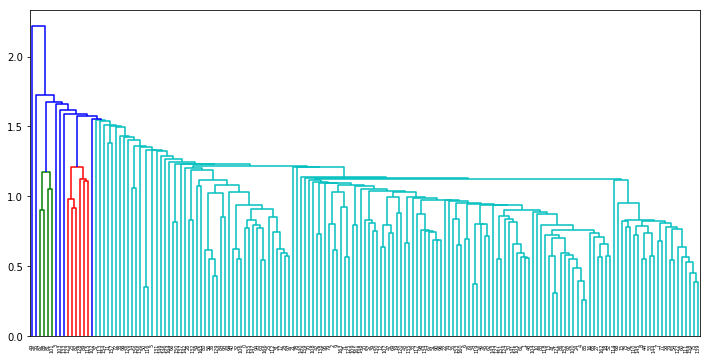

In [67]:
# single linkage
plt.figure(figsize=(12,6))
mergings = linkage(pca_hie, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

- As the dendrogram is not very much interpretable using single linkage, we shall use complete linkage

#### COMPLETE LINKAGE

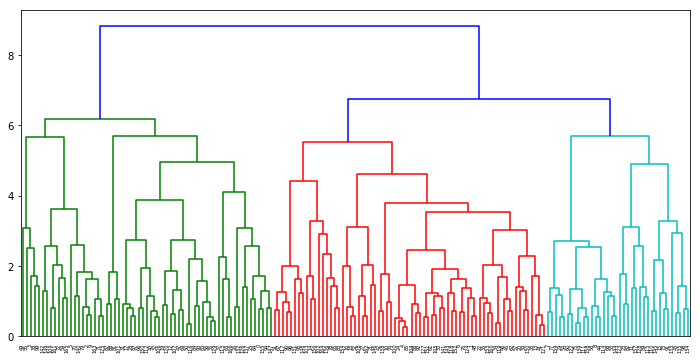

In [68]:
# complete linkage
plt.figure(figsize=(12,6))
mergings = linkage(pca_df_final, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

- we can infer from the dendrogram that 3 clusters can be formed when we cut it at a height 6.5

#### HIERARCHICAL CLUSTERING WITH NO OF CLUSTERS 3

In [69]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0])

#### ASSIGNING CLUSTER IDS-no of clusters 3

In [70]:
country_hie = country_df.copy()

In [71]:
# assign cluster ids to original variables
country_hie['cluster_lab'] = cluster_labels
country_hie.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_lab
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,4.49,76.3,1.650,4090.0,1
2,Algeria,27.3,38.40,4.17,31.4,12900.0,16.10,76.5,2.890,4460.0,0
3,Angola,116.0,62.30,2.85,42.9,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,1.44,76.8,2.130,12200.0,1


In [72]:
# assign the cluster_id - principal componants
pca_hie['cluster_lab'] = cluster_labels
pca_hie['country']=country_df['country']
pca_hie.head()

,PC1,PC2,PC3,PC4,PC5,cluster_lab,country
0,-3.276496,-0.384763,1.062327,0.915380,0.050308,0,Afghanistan
1,0.482584,-0.138287,0.316266,-1.430107,0.097874,1,Albania
2,-0.447400,-0.491523,-1.776731,-0.670289,0.515918,0,Algeria
3,-3.357084,1.158895,-2.059029,1.732847,0.082381,0,Angola
4,1.245015,0.702900,0.224338,-0.744108,-0.447938,1,Antigua and Barbuda


#### CLUSTER ANALYSIS - HIERARCHICAL CLUSTERING

#### Cluster analysis with respect to PRINCIPAL COMPONANTS:

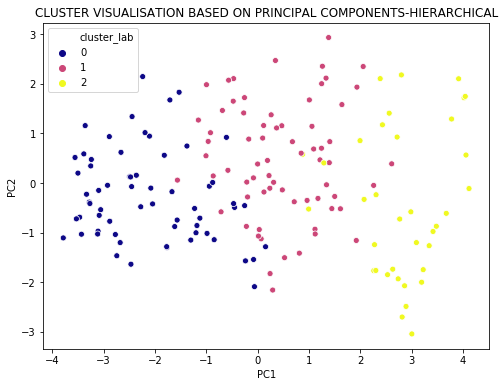

In [73]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(x='PC1',y='PC2',hue='cluster_lab',legend='full',palette="plasma",data=pca_hie)
plt.title('CLUSTER VISUALISATION BASED ON PRINCIPAL COMPONENTS-HIERARCHICAL')
plt.show()

- We have plotted first 2 principal componants for the countries and can clearly see 3 clusters from the plot

#### Cluster analysis with respect to ORIGINAL VARIABLES:

In [74]:
country_hie['cluster_lab'].value_counts()

1    68
0    63
2    36
Name: cluster_lab, dtype: int64

#####  Lets visualise the clusters to analyse it by comparing how the three variables - [gdpp, child_mort and income] vary for each cluster of countries :

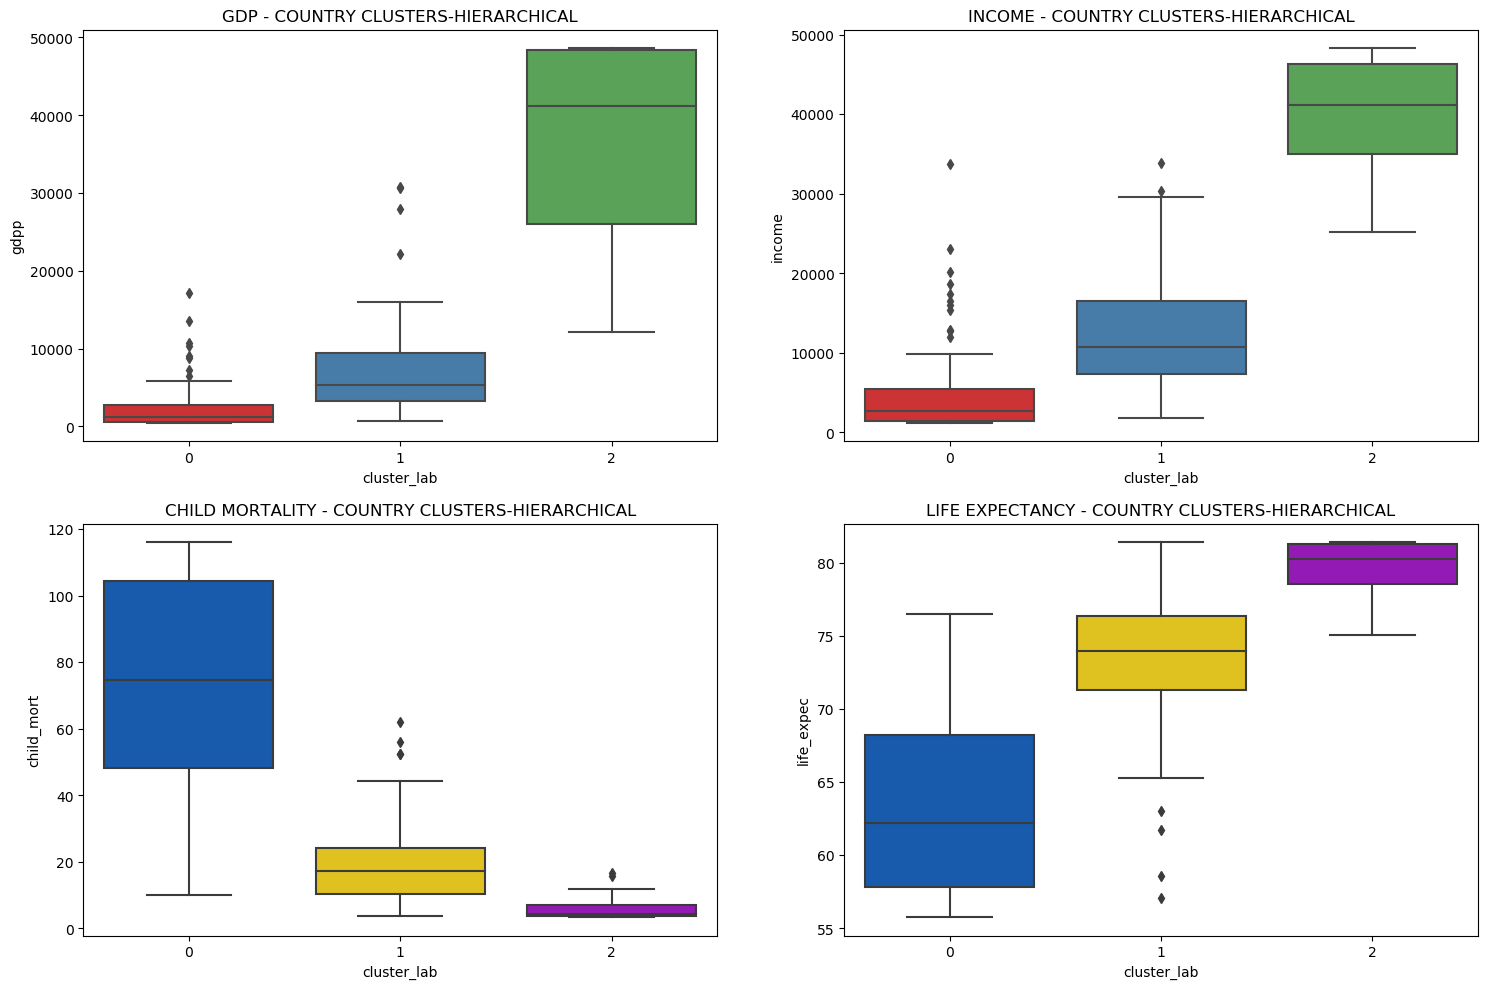

In [75]:
plt.figure(figsize=(18, 12),dpi=100)
plt.subplot(2,2,1)
sns.boxplot(x='cluster_lab', y='gdpp', data=country_hie, palette='Set1')
plt.title('GDP - COUNTRY CLUSTERS-HIERARCHICAL')
plt.subplot(2,2,2)
sns.boxplot(x='cluster_lab', y='income', data=country_hie,palette='Set1')
plt.title('INCOME - COUNTRY CLUSTERS-HIERARCHICAL')
plt.subplot(2,2,3)
sns.boxplot(x='cluster_lab', y='child_mort', data=country_hie,palette='prism')
plt.title('CHILD MORTALITY - COUNTRY CLUSTERS-HIERARCHICAL')
plt.subplot(2,2,4)
sns.boxplot(x='cluster_lab', y='life_expec', data=country_hie,palette='prism')
plt.title('LIFE EXPECTANCY - COUNTRY CLUSTERS-HIERARCHICAL')
plt.show()

- From the above plot, its clear that ALL THE 3 clusters are unique
- Cluster 0 - UNDER - DEVELOPED COUNTRIES - VERY LOW gdpp,income & life_expec & HIGH child_mort
- Cluster 1 - DEVELOPING COUNTRIES - LOW gdpp, AVERAGE income & life_expec & LOW child_mort
- Cluster 2 - DEVELOPED COUNTRIES - HIGH gdpp,income & life_expec & VERY LOW child_mort
- Its evident that cluster 2 needs AID
- Lets do further analysis and confirm which all countries need AID

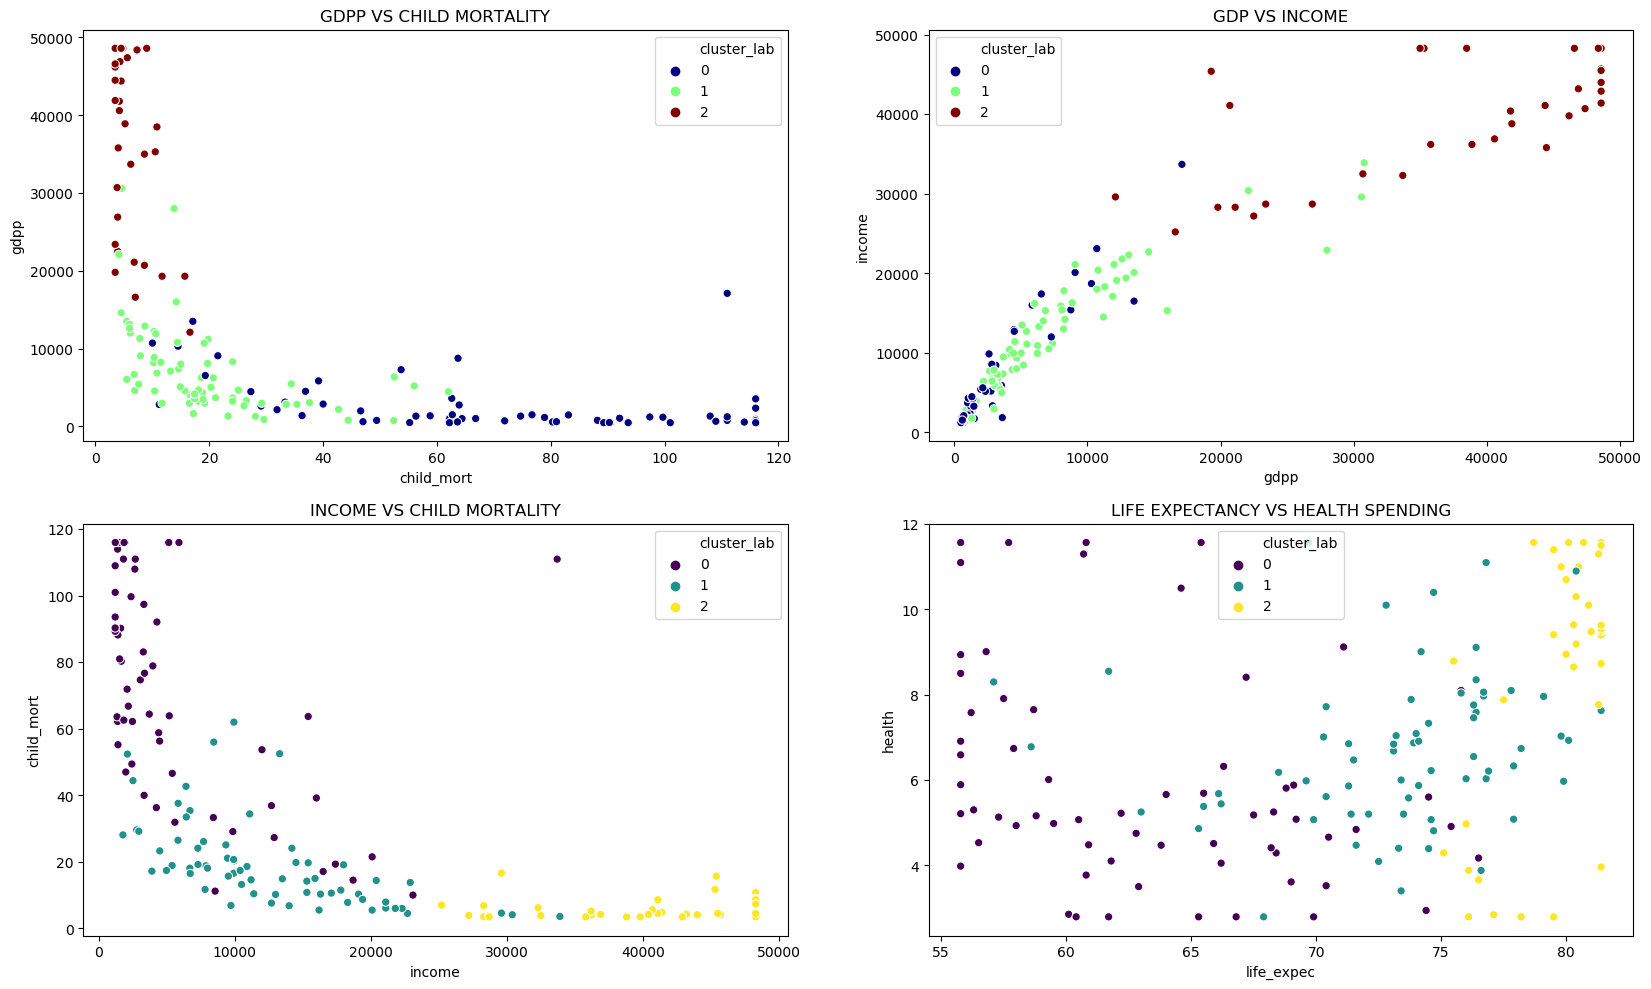

In [76]:
# plotting original variables on the clusters
plt.figure(figsize=(20, 12),dpi=100)
plt.subplot(2,2,1)
sns.scatterplot(x='child_mort',y='gdpp',hue='cluster_lab',legend='full',palette="jet",data=country_hie)
plt.title('GDPP VS CHILD MORTALITY')

plt.subplot(2,2,2)
sns.scatterplot(x='gdpp',y='income',hue='cluster_lab',legend='full',palette="jet",data=country_hie)
plt.title('GDP VS INCOME')

plt.subplot(2,2,3)
sns.scatterplot(x='income',y='child_mort',hue='cluster_lab',legend='full',palette="viridis",data=country_hie)
plt.title('INCOME VS CHILD MORTALITY')

plt.subplot(2,2,4)
sns.scatterplot(x='life_expec',y='health',hue='cluster_lab',legend='full',palette="viridis",data=country_hie)
plt.title('LIFE EXPECTANCY VS HEALTH SPENDING')
plt.show()

- The relationship between original varaibles is the same as kmeans

#### MEAN ANALYSIS OF CLUSTERS:

In [77]:
country_hie_mean = country_hie.groupby(['cluster_lab']).mean()

In [78]:
country_hie_mean = country_hie_mean.reset_index()
country_hie_mean.head()

,cluster_lab,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,73.168254,28.398413,5.941349,37.554444,5540.111111,11.023254,63.297143,4.275698,2549.001587
1,1,19.438235,42.994559,6.679721,52.964412,12446.029412,4.889282,73.176471,2.245441,7474.176471
2,2,5.990000,51.449444,8.378694,44.675556,39883.611111,4.020789,79.580556,1.832778,37105.277778


#### renaming the cluster ids:
-  cluster_lab 0 -> UNDER - DEVELOPED COUNTRIES
-  cluster_lab 1 -> DEVELOPING COUNTRIES
-  cluster_lab 2 -> DEVELOPED COUNTRIES

In [79]:
def cluster(x,y):
    country_hie_mean['cluster_lab'].replace(x,y,inplace=True)
    
cluster(0,'UnderDeveloped countries')
cluster(1,'Developing countries')
cluster(2,'Developed countries')

In [80]:
country_hie_mean.head()

,cluster_lab,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,UnderDeveloped countries,73.168254,28.398413,5.941349,37.554444,5540.111111,11.023254,63.297143,4.275698,2549.001587
1,Developing countries,19.438235,42.994559,6.679721,52.964412,12446.029412,4.889282,73.176471,2.245441,7474.176471
2,Developed countries,5.990000,51.449444,8.378694,44.675556,39883.611111,4.020789,79.580556,1.832778,37105.277778


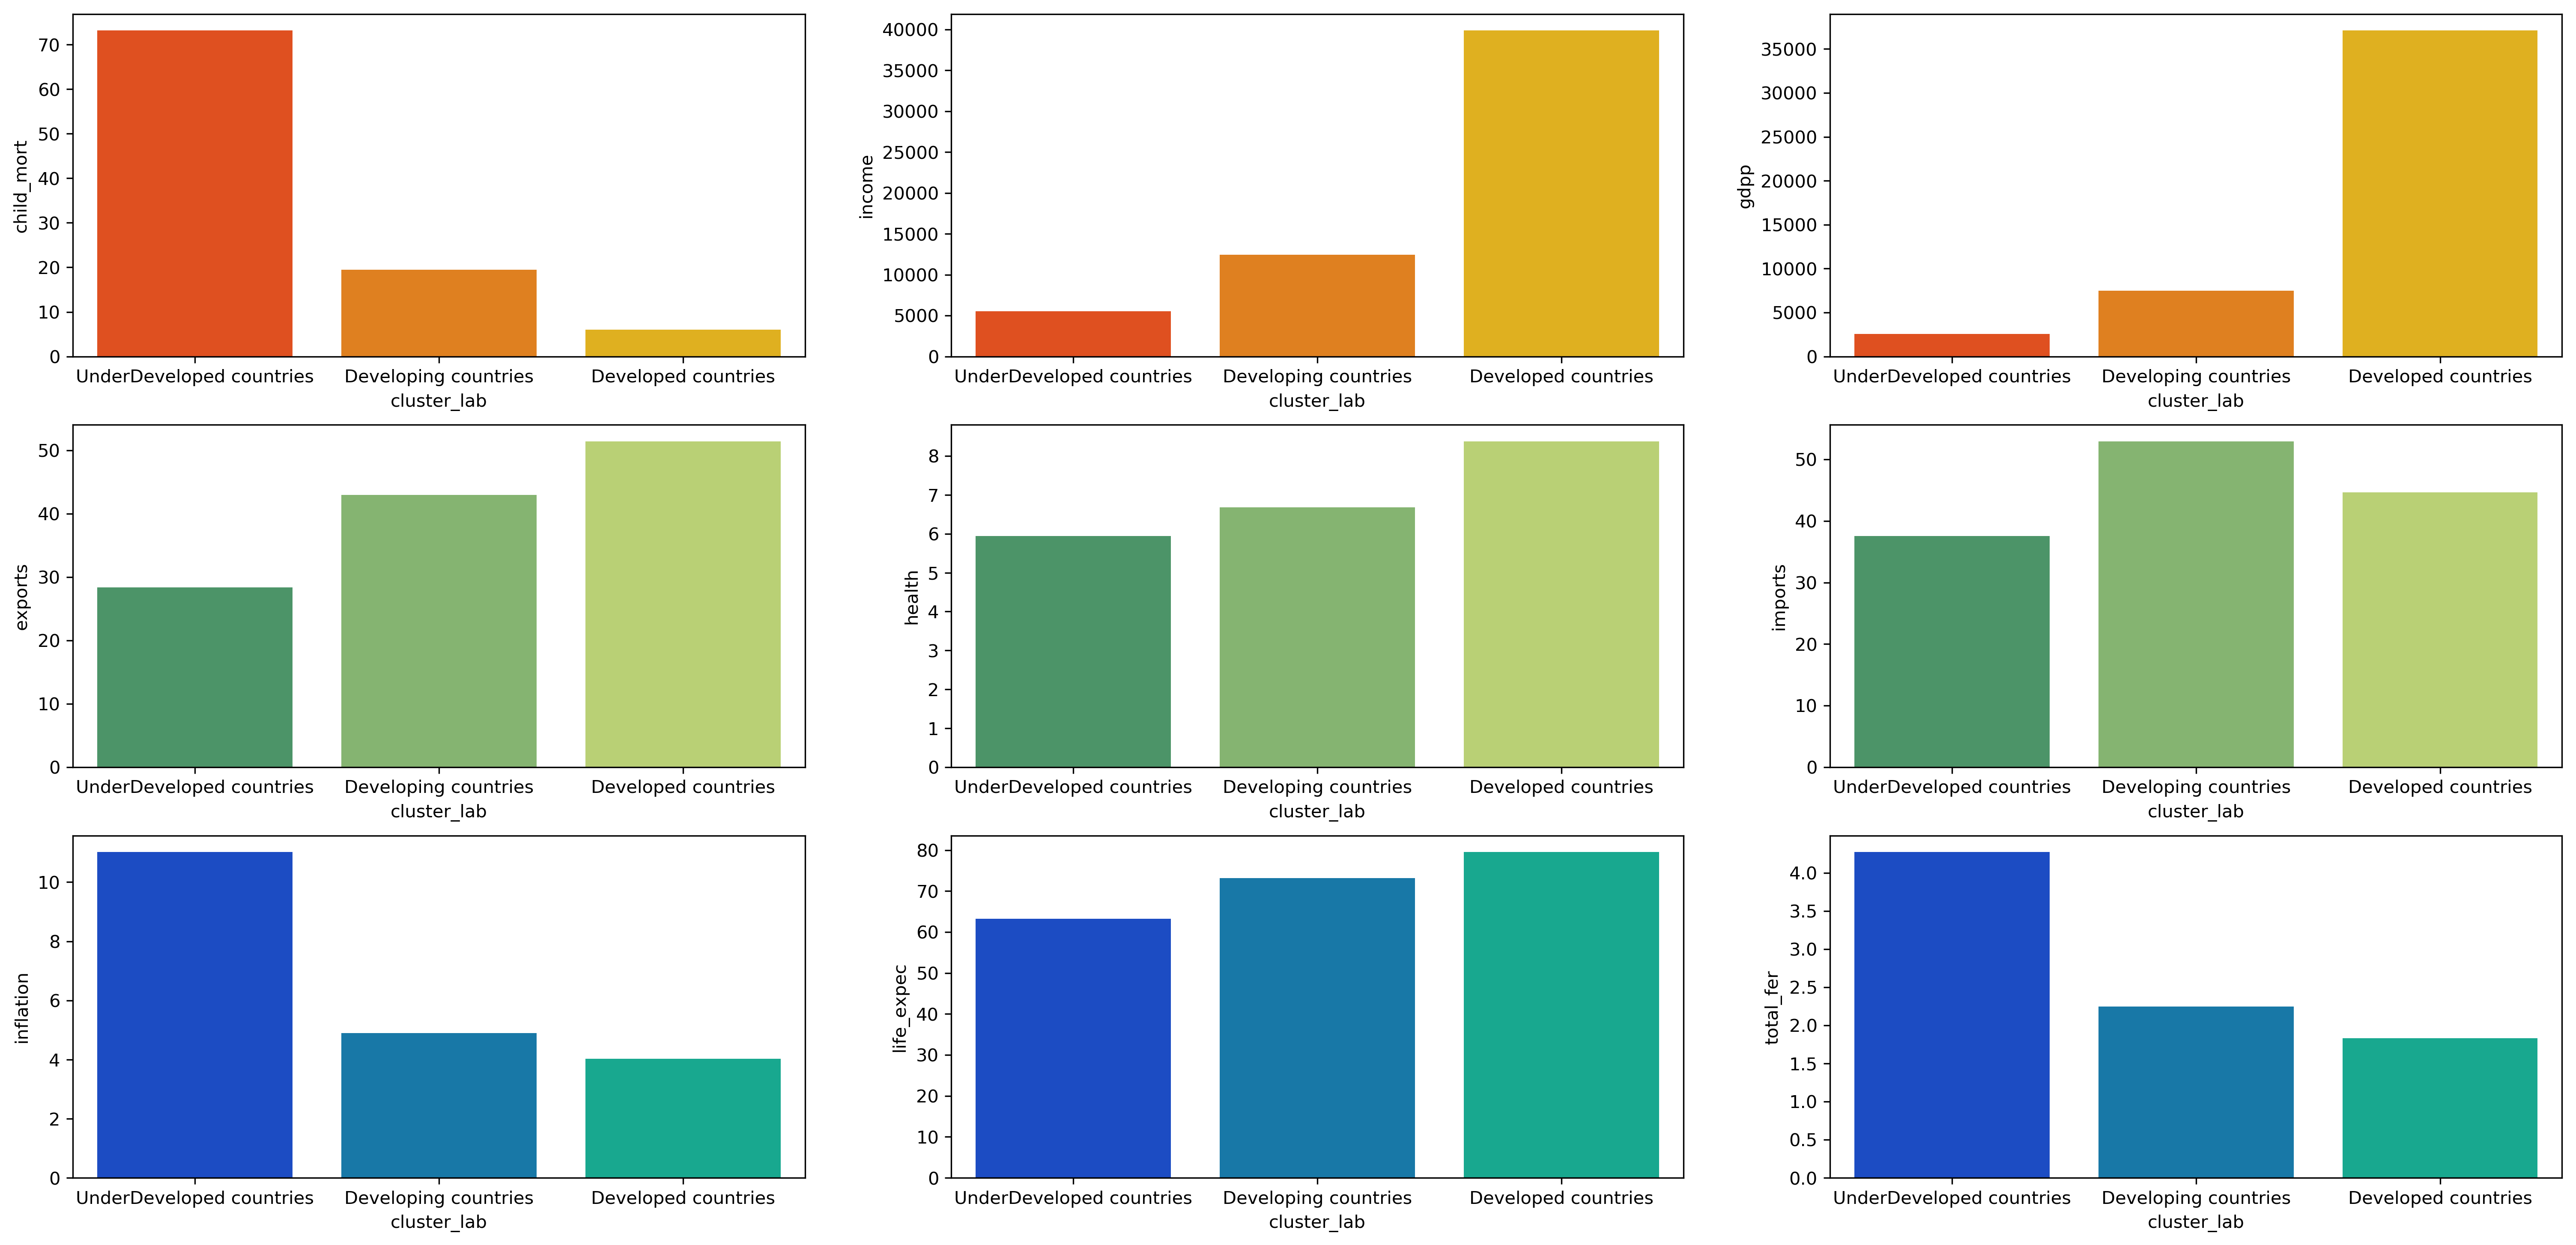

In [81]:
plt.figure(figsize=(25, 12),dpi=300)
plt.subplot(3,3,1)
sns.barplot(x='cluster_lab',y='child_mort',data=country_hie_mean,palette='autumn')

plt.subplot(3,3,2)
sns.barplot(x='cluster_lab',y='income',data=country_hie_mean,palette='autumn')

plt.subplot(3,3,3)
sns.barplot(x='cluster_lab',y='gdpp',data=country_hie_mean,palette='autumn')

plt.subplot(3,3,4)
sns.barplot(x='cluster_lab',y='exports',data=country_hie_mean,palette='summer')

plt.subplot(3,3,5)
sns.barplot(x='cluster_lab',y='health',data=country_hie_mean,palette='summer')

plt.subplot(3,3,6)
sns.barplot(x='cluster_lab',y='imports',data=country_hie_mean,palette='summer')

plt.subplot(3,3,7)
sns.barplot(x='cluster_lab',y='inflation',data=country_hie_mean,palette='winter')

plt.subplot(3,3,8)
sns.barplot(x='cluster_lab',y='life_expec',data=country_hie_mean,palette='winter')

plt.subplot(3,3,9)
sns.barplot(x='cluster_lab',y='total_fer',data=country_hie_mean,palette='winter')

plt.show()

- From the mean analysis of cluster of all variables in hierarchical clustering, we can observe that its same as kmeans:
    - Only gdpp, income & child_mort show considerable difference in clusters.
    - Developed countries:
        - HIGH - gdp, income, health spending, exports, life expectancy
        - Avg - imports
        - VERY LOW - child mortality, inflation, total fertility
    - Developing countries:
        - AVG - health spending,exports, life expectancy, total fertility,child mortality, inflation,income
        - HIGH - imports
        - LOW - gdp
    - UnderDeveloped countries:
        - VERY LOW - gdp, income,exports, life expectancy,Imports
        - Avg - health spending
        - HIGH - child mortality, inflation, total fertility

#### PLOTTING TOP 10 COUNTRIES IN EACH CLUSTER WRT GDPP,INCOME & CHILD_MORT - Hierarchical

In [82]:
# forming 3 new dataframe for each cluster
developed_hie = country_hie.loc[country_hie.cluster_lab ==2]
developing_hie = country_hie.loc[country_hie.cluster_lab==1]
UnderDeveloped_hie = country_hie.loc[country_hie.cluster_lab ==0]

In [83]:
print(developed_hie.shape)
print(developing_hie.shape)
print(UnderDeveloped_hie.shape)

(36, 11)
(68, 11)
(63, 11)


#### DEVELOPED COUNTRIES-CLUSTER 2-HIERARCHICAL:

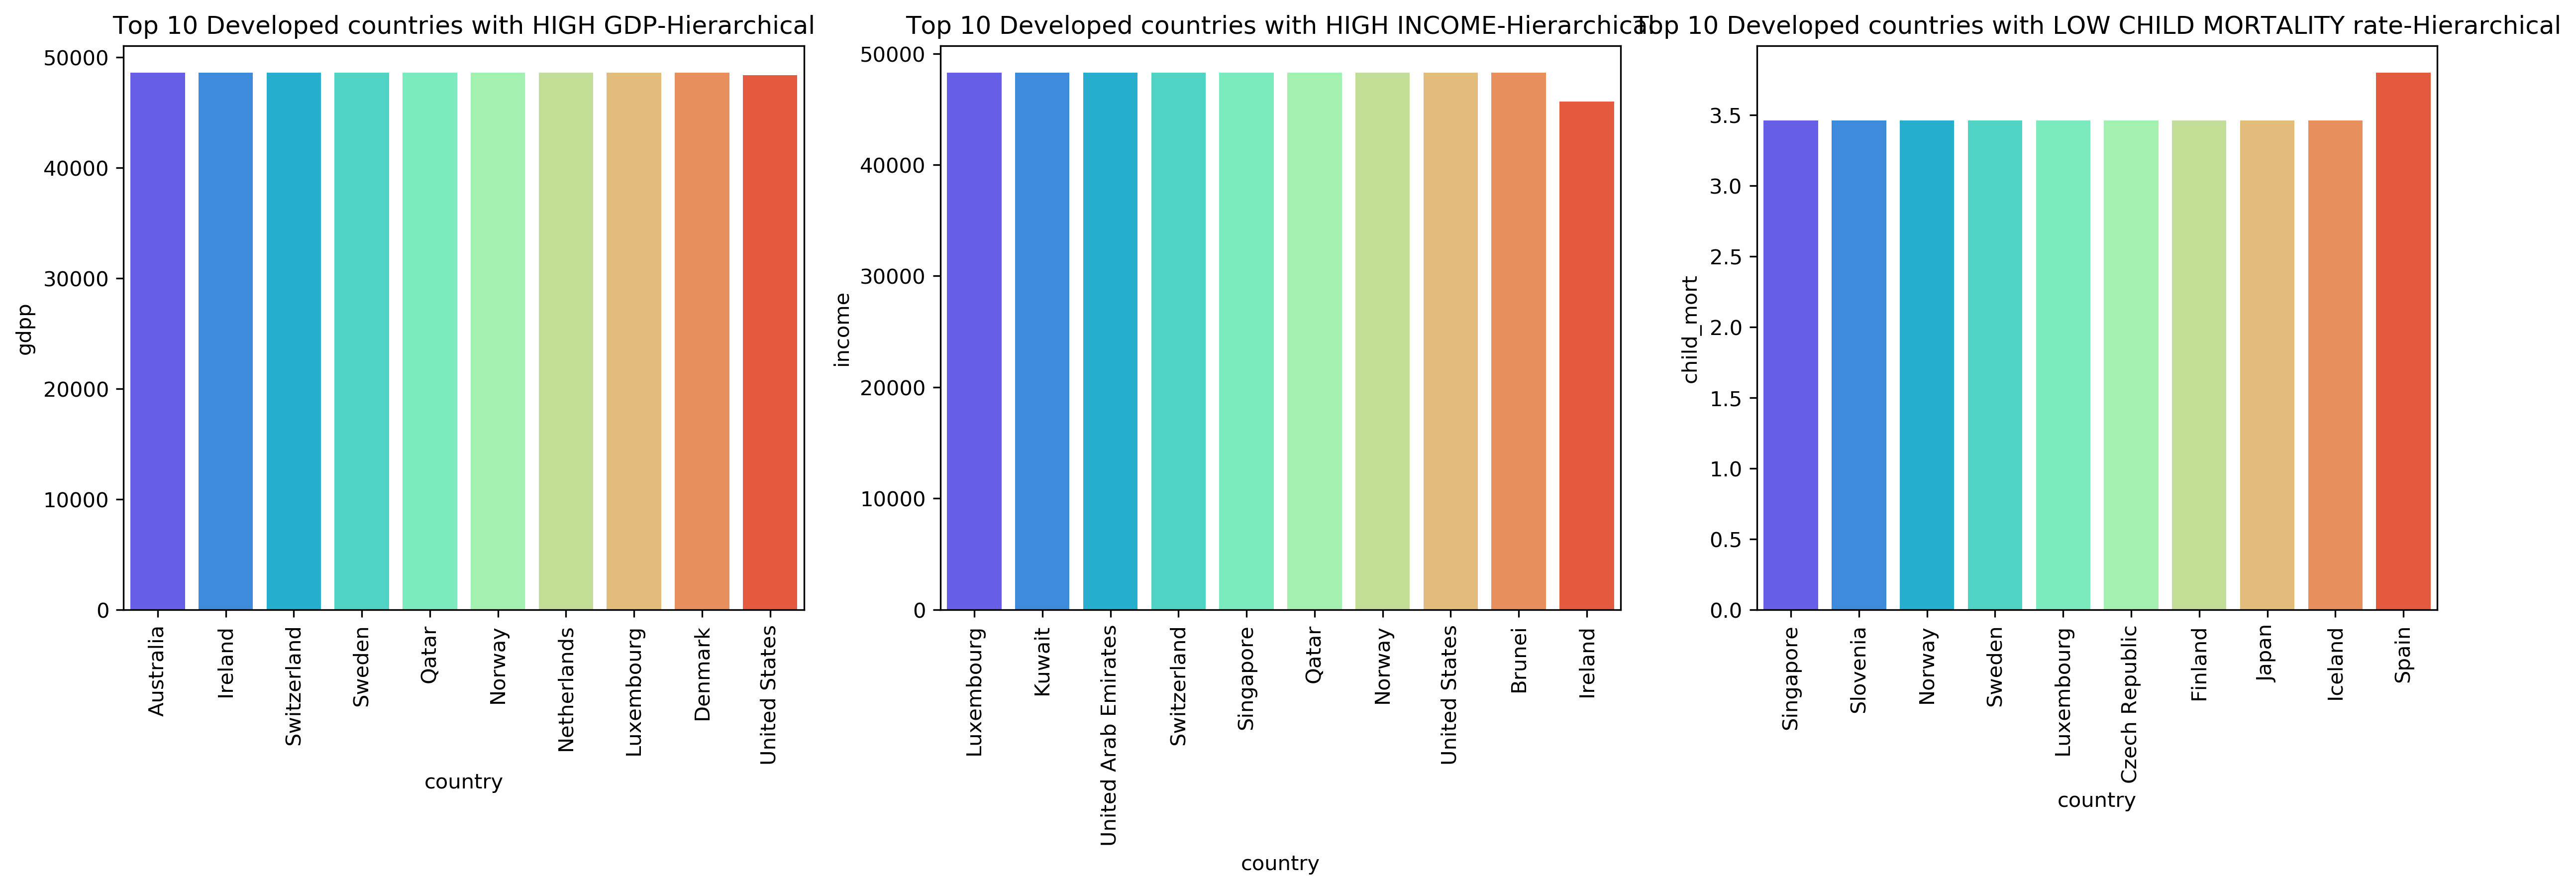

In [84]:
plt.figure(figsize=(20,5),dpi=300)
plt.subplot(1,3,1)
result = developed_hie.groupby(["country"])['gdpp'].aggregate(np.median).reset_index().sort_values('gdpp',ascending = False)
top10_gdp_2_hie = result.head(10)
ax = sns.barplot(x='country',y='gdpp',data=top10_gdp_2_hie,palette='rainbow')
plt.title('Top 10 Developed countries with HIGH GDP-Hierarchical')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
result = developed_hie.groupby(["country"])['income'].aggregate(np.median).reset_index().sort_values('income',ascending = False)
top10_inc_2_hie = result.head(10)
ax = sns.barplot(x='country',y='income',data=top10_inc_2_hie, palette='rainbow')
plt.title('Top 10 Developed countries with HIGH INCOME-Hierarchical')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
result = developed_hie.groupby(["country"])['child_mort'].aggregate(np.median).reset_index().sort_values('child_mort',ascending = True)
top10_chi_2_hie = result.head(10)
ax = sns.barplot(x='country',y='child_mort',data=top10_chi_2_hie,palette='rainbow')
plt.title('Top 10 Developed countries with LOW CHILD MORTALITY rate-Hierarchical')
plt.xticks(rotation='vertical')
plt.show()

- The developed countries have very high gdp and income per person and very low child mortality rate
- Below are the top developed countries:
   - Australia
   - Denmark
   - Switzerland
   - Sweden
   - Qatar
   - Norway
   - Netherlands
   - Luxemberg
   - Ireland
   - UnitedStates
   - UAE
   - Kuwait
   - Singapore
   - Iceland
   - Japan
   - Finland

- Top 10 are same as kmeans

#### DEVELOPING COUNTRIES-CLUSTER 1-HIERARCHICAL:

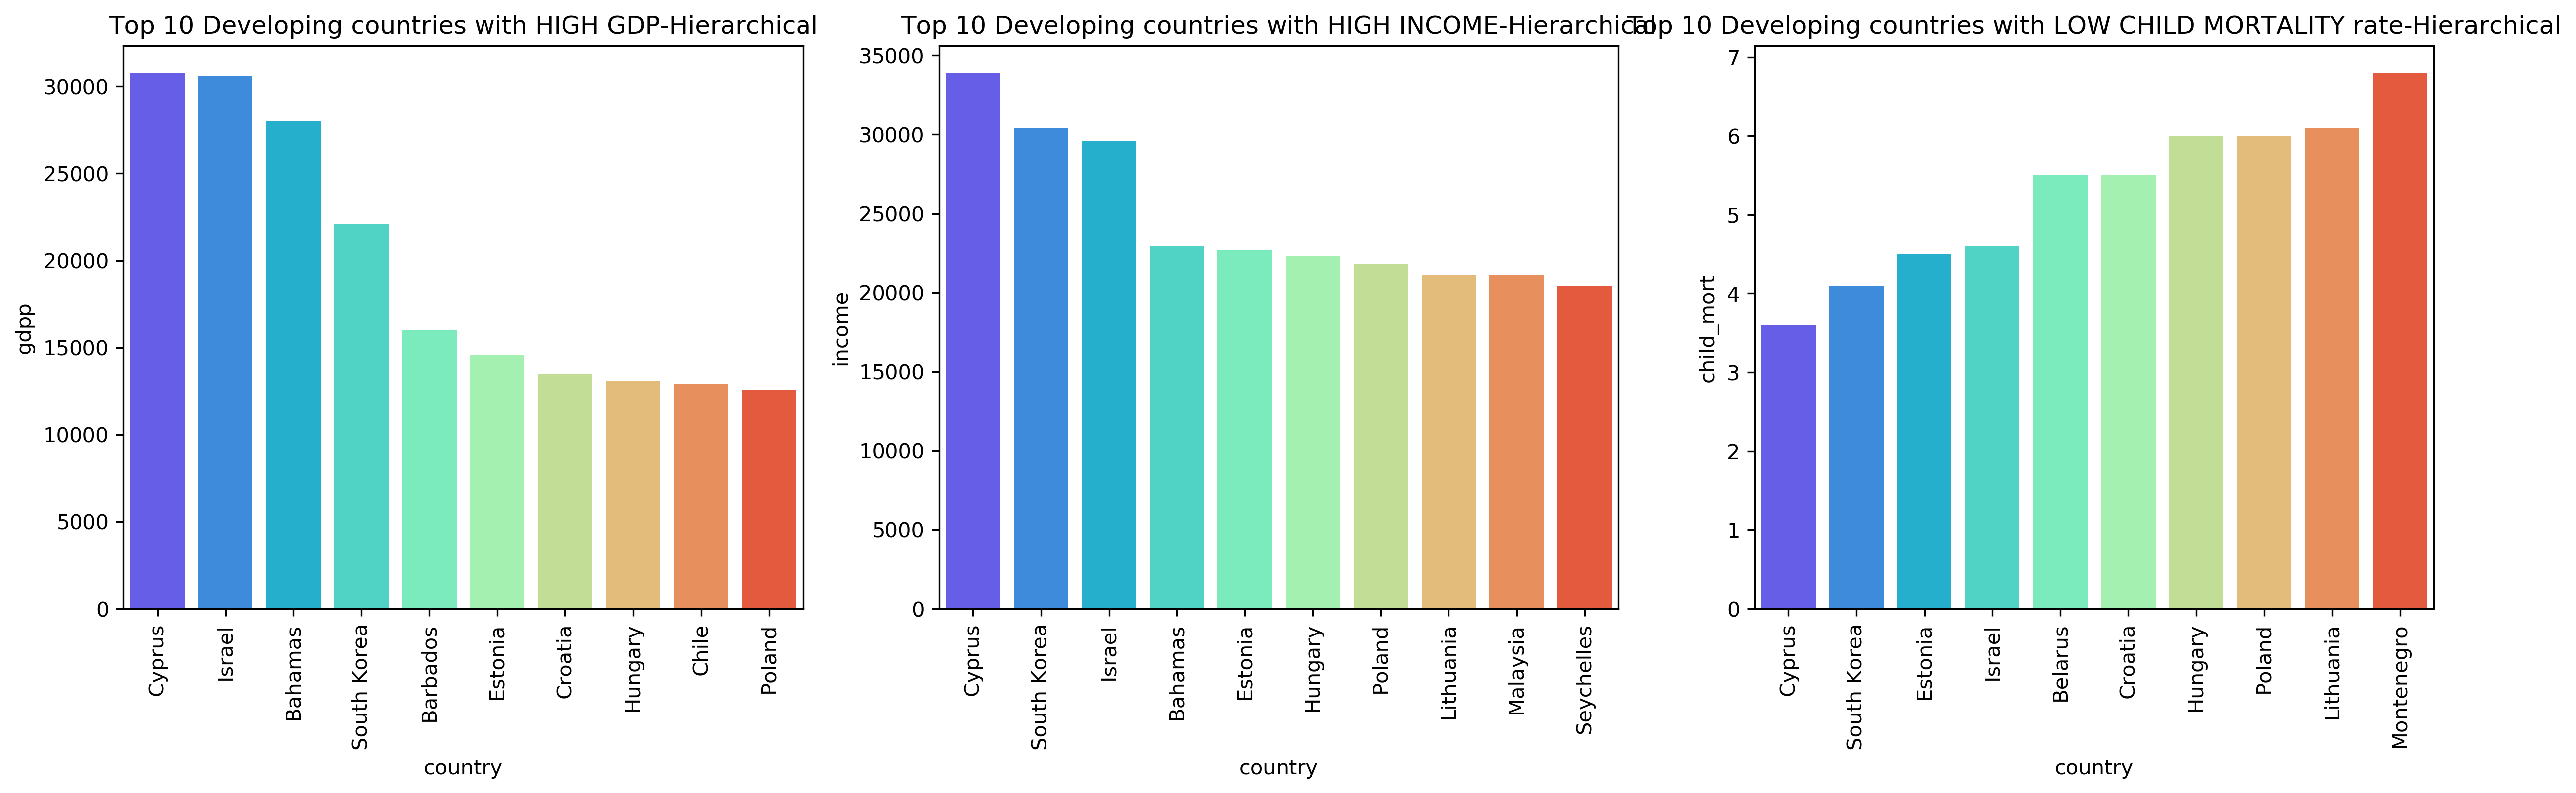

In [85]:
plt.figure(figsize=(20,5),dpi=300)
plt.subplot(1,3,1)
result = developing_hie.groupby(["country"])['gdpp'].aggregate(np.median).reset_index().sort_values('gdpp',ascending = False)
top10_gdp_1_hie = result.head(10)
ax = sns.barplot(x='country',y='gdpp',data=top10_gdp_1_hie, palette='rainbow')
plt.title('Top 10 Developing countries with HIGH GDP-Hierarchical')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
result = developing_hie.groupby(["country"])['income'].aggregate(np.median).reset_index().sort_values('income',ascending = False)
top10_inc_1_hie = result.head(10)
ax = sns.barplot(x='country',y='income',data=top10_inc_1_hie, palette='rainbow')
plt.title('Top 10 Developing countries with HIGH INCOME-Hierarchical')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
result = developing_hie.groupby(["country"])['child_mort'].aggregate(np.median).reset_index().sort_values('child_mort',ascending = True)
top10_chi_1_hie = result.head(10)
ax = sns.barplot(x='country',y='child_mort',data=top10_chi_1_hie, palette='rainbow')
plt.title('Top 10 Developing countries with LOW CHILD MORTALITY rate-Hierarchical')
plt.xticks(rotation='vertical')
plt.show()

- The developing countries have very low gdp and income per person and average child mortality rate
- Below are the top developed countries:
   - CYPRUS
   - Israel
   - Bahamas
   - South Korea
   - Estonia
   - Croatia
   - Hungary
   - Chile
   - Poland
   - Malaysia
   - Lithuania
   - Barbados
   - Belarus

- The top developing countries vary slighly from kmeans clustering

#### UNDER-DEVELOPED COUNTRIES-CLUSTER 0 - HIERARCHICAL:

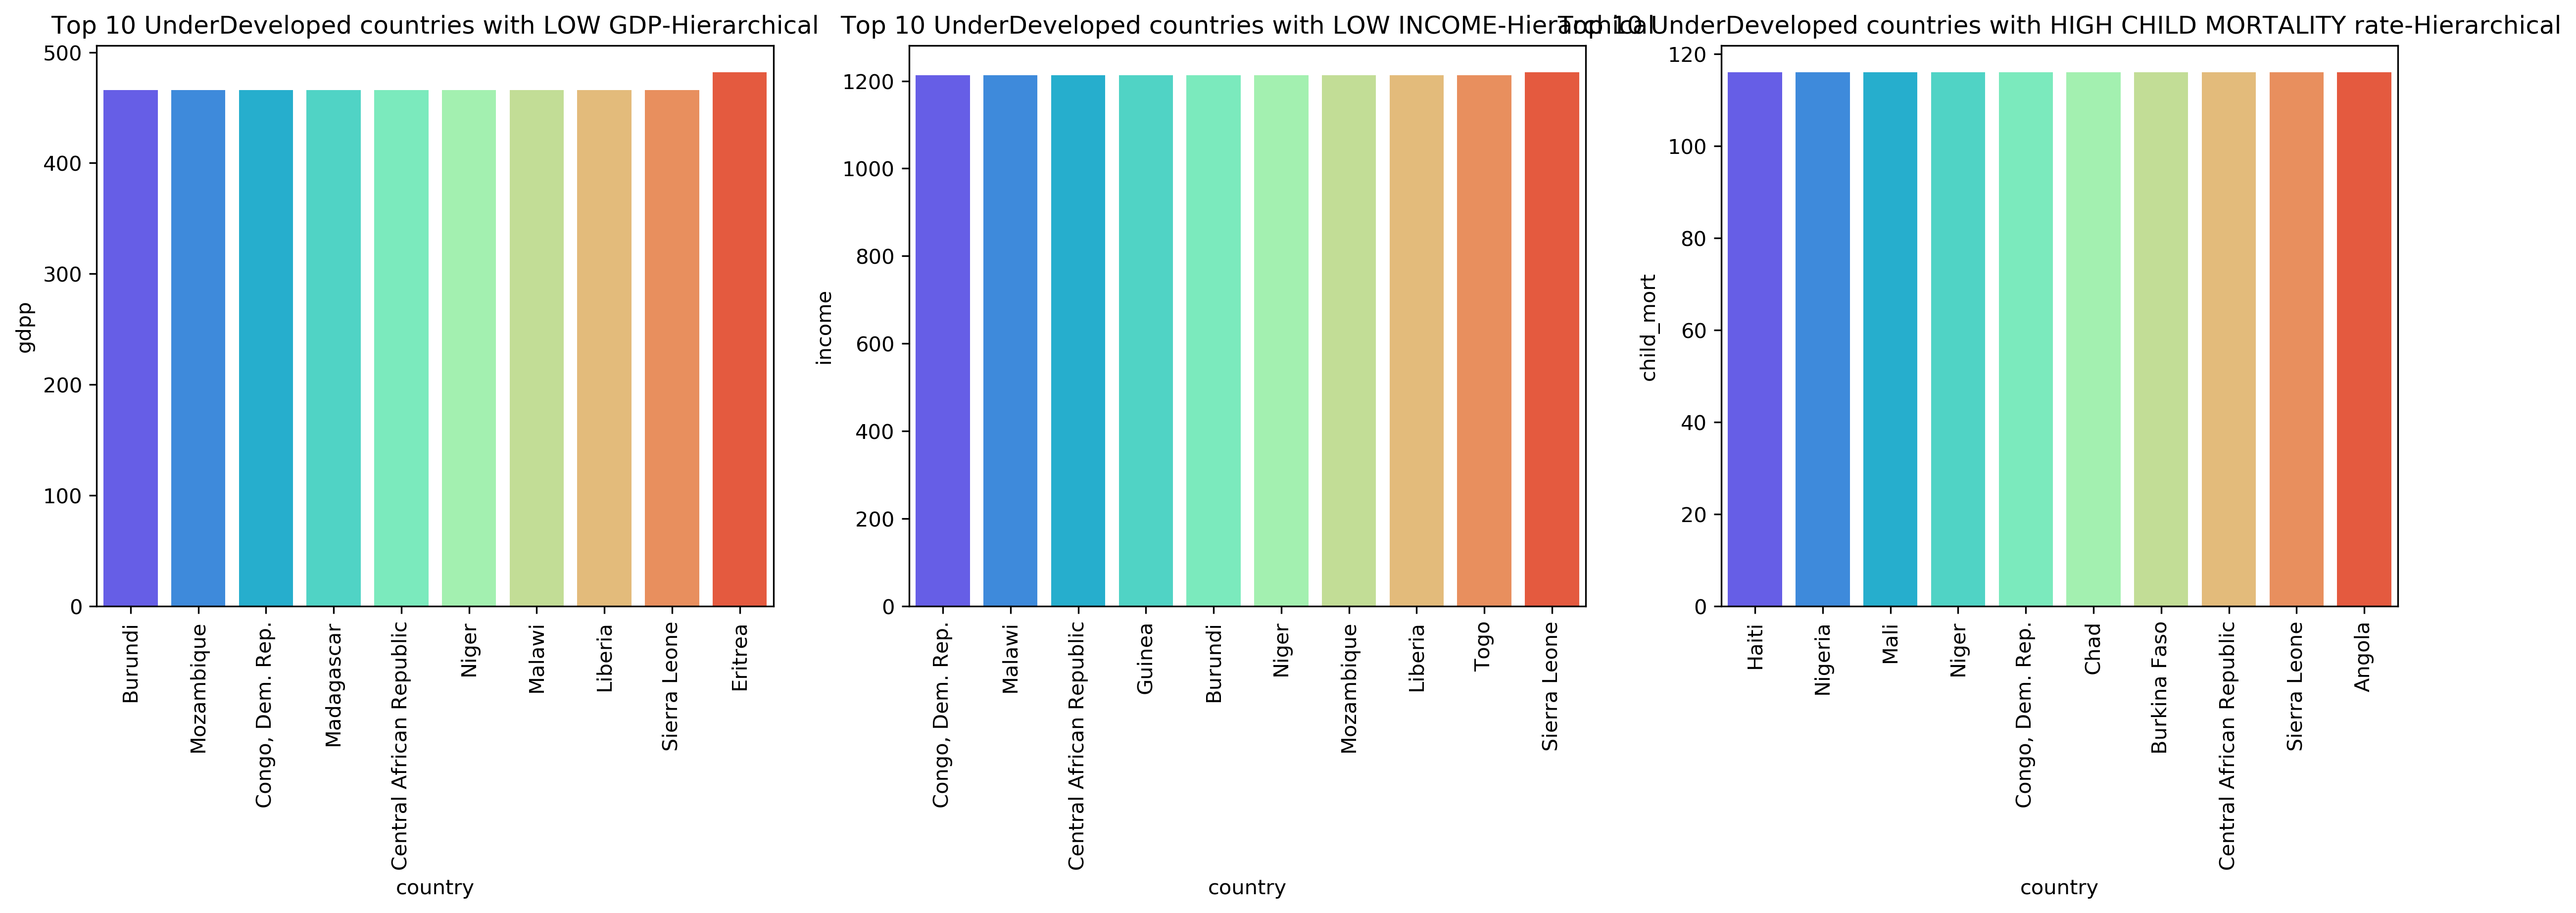

In [86]:
plt.figure(figsize=(20,5),dpi=300)
plt.subplot(1,3,1)
result = UnderDeveloped_hie.groupby(["country"])['gdpp'].aggregate(np.median).reset_index().sort_values('gdpp',ascending = True)
top10_gdp_0_hie = result.head(10)
ax = sns.barplot(x='country',y='gdpp',data=top10_gdp_0_hie,palette='rainbow')
plt.title('Top 10 UnderDeveloped countries with LOW GDP-Hierarchical')
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
result = UnderDeveloped_hie.groupby(["country"])['income'].aggregate(np.median).reset_index().sort_values('income',ascending = True)
top10_inc_0_hie = result.head(10)
ax = sns.barplot(x='country',y='income',data=top10_inc_0_hie,palette='rainbow')
plt.title('Top 10 UnderDeveloped countries with LOW INCOME-Hierarchical')
plt.xticks(rotation=90)

plt.subplot(1,3,3)
result = UnderDeveloped_hie.groupby(["country"])['child_mort'].aggregate(np.median).reset_index().sort_values('child_mort',ascending = False)
top10_chi_0_hie = result.head(10)
ax = sns.barplot(x='country',y='child_mort',data=top10_chi_0_hie,palette='rainbow')
plt.title('Top 10 UnderDeveloped countries with HIGH CHILD MORTALITY rate-Hierarchical')
plt.xticks(rotation='vertical')
plt.show()

In [87]:
top10_gdp_0_hie['country'].values

array(['Burundi', 'Mozambique', 'Congo, Dem. Rep.', 'Madagascar',
       'Central African Republic', 'Niger', 'Malawi', 'Liberia',
       'Sierra Leone', 'Eritrea'], dtype=object)

In [88]:
top10_inc_0_hie['country'].values

array(['Congo, Dem. Rep.', 'Malawi', 'Central African Republic', 'Guinea',
       'Burundi', 'Niger', 'Mozambique', 'Liberia', 'Togo',
       'Sierra Leone'], dtype=object)

In [89]:
top10_chi_0_hie['country'].values

array(['Haiti', 'Nigeria', 'Mali', 'Niger', 'Congo, Dem. Rep.', 'Chad',
       'Burkina Faso', 'Central African Republic', 'Sierra Leone',
       'Angola'], dtype=object)

- As per hierarchical clustering, below are the countries which are in dire need of aid. The below countries have very low gdp and income per person and very high child mortality rate
    - Burundi
    - Malawi
    - Niger
    - Mozambique
    - Central African republic
    - Sierre Leone
    - Congo, Dem rep
    - Liberia
    - Eritrea
    - Togo
    - Guinea
    - Madagascar
    - Angola
    - Mali
    - Haiti
    - Burkino Faso
    - Chad
    - Nigeria
- The results from hierarchical are same as kmeans for under-developed countries

### SUMMARY:

- The main aim of the exercise was to is to categorise the countries using some socio-economic and health factors that determine the overall development of the country

- AFter initial data inspection, cleaning, eda & scaling, Principal component analysis was done and with the obtained principal componants, K-means clustering and hierarchical clustering with single and complete linkage were performed

- Kmeans with K=3 perfectly differentiated 3 clusters Cluster 0 was developed countries, cluster 1 - developing countries & cluster 2 - UnderDeveloped countries

- Upon clustering using hierarchical method, countries were segmented into 3 clusters as cluster 2 - Developed,cluster 1- developing & cluster 0 - Under-Developed countries

- AMong other factors, Income, GDP and child mortality showed huge difference between clusters in both kmeans & hierarchical

- Both methods yielded the same results as below, only cluster labels were different:

    - Developed countries visualisations showed HIGH gdp and income, LOW child mortality rate

    - Developing countries showed low gdp, income and average child mortality rate

    - Under developed countries visualisations depicted VERY LOW gdp, income & VERY HIGH child mortality rate
    
- Top 10 countries were the same in both methods only with difference of few developing countries
    
- As hierarchical dendrogram clearly showed 3 different clusters, am going ahead with results of hierarchical clustering

### RECOMMENDATIONS:

- Upon above analysis,
- Below are the UNDER-DEVELOPED countries which are in dire need of aid and i suggest the below 18 UNDER-DEVELOPED countries for HELP INTERNATIONAL CEO  to focus the most:
    - Burundi
    - Malawi
    - Niger
    - Mozambique
    - Central African republic
    - Sierre Leone
    - Congo, Dem rep
    - Liberia
    - Eritrea
    - Togo
    - Guinea
    - Madagascar
    - Angola
    - Mali
    - Haiti
    - Burkino Faso
    - Chad
    - Nigeria

## END